In [13]:

#Declaring All libraries
import numpy as np
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [15]:
# Module 1
#First Part
data=pd.read_json("electronics.json")
#No let's Find out empty/null enteries from it
data.replace('', np.nan, inplace=True)
data['Purchase_Date'].replace('Hidden',np.nan,inplace=True)
data['Month'].replace('Hidden',np.nan,inplace=True)
#Missing values count in each field
data.isna().sum()



Customer_ID                      32
Age                              33
Gender                           33
Income_Level                     41
Address                          32
Transaction_ID                   39
Purchase_Date                    48
Product_ID                       40
Product_Category                 44
Brand                            46
Purchase_Amount                  33
Average_Spending_Per_Purchase    26
Purchase_Frequency_Per_Month     37
Brand_Affinity_Score             47
Product_Category_Preferences     31
Month                            53
Year                             39
Season                           36
dtype: int64

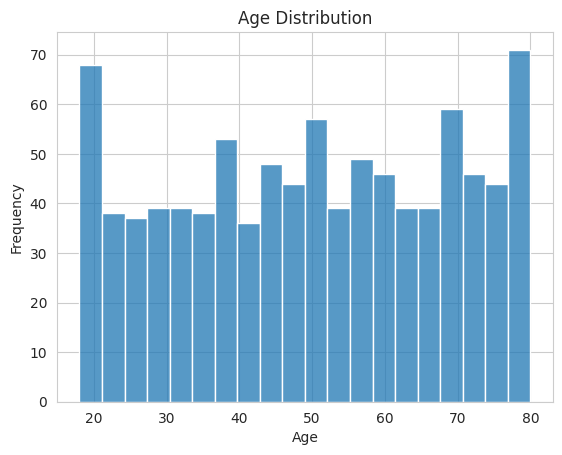

In [16]:
#As cutomer id does not matter much in our analysis so we don't fill it with anything  right now rst we should dropthose id that are null
data.dropna(subset=['Customer_ID'],inplace=True)
# As age is an integer value let's visualize first that how actually it looks like as it is skewed or not then we will decide whther we will
#replace them with median or mode
data['Age']=pd.to_numeric(data['Age'],errors='coerce')
sns.histplot(data['Age'],bins=20,kde=False)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()
data['Age'].skew()
#As we can view from the data that it is a little bit skewed on the right side(negatively skewed ) and by the value of skew() function
#we can say that we can use either mean or median both for the analysis
meanAge=data['Age'].mean()
data['Age'].fillna(meanAge,inplace=True)
# Now we have filled out the Age data let's move toward next data

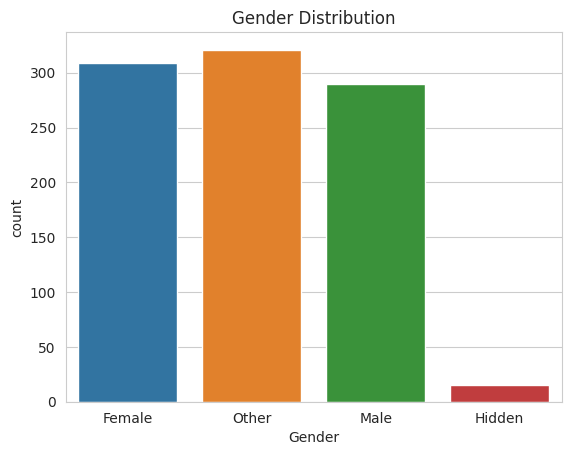

0

In [17]:
#Let's check for variable gender

sns.countplot(x='Gender', data=data)
plt.title('Gender Distribution')
plt.show()
# From the graph we take a look at Gender Distribution as hidden category is not that much important for us at that time and
#missing values are also small portion of our data so we can use mode to fill out these values
modeGender=data['Gender'].mode()[0]
data['Gender'].fillna(modeGender,inplace=True)
data['Gender'].isna().sum()


# gender_counts = data['Gender'].value_counts()

# # Creating the bar chart
# plt.bar(gender_counts.index, gender_counts.values)
# plt.title('Gender Distribution')
# plt.xlabel('Gender')
# plt.ylabel('Count')
# plt.show()




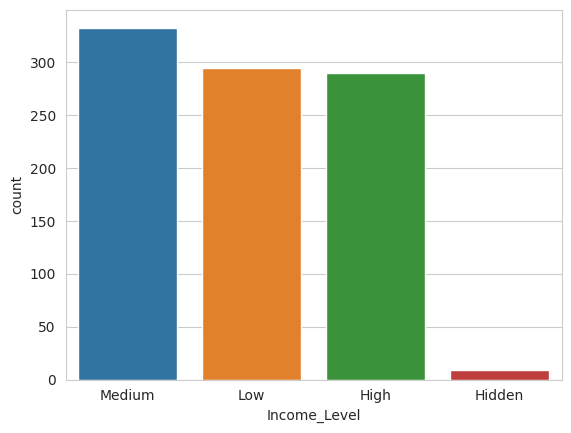

0

In [18]:
#Now let's take a look at the data for Income_level
sns.countplot(x='Income_Level',data=data)
plt.show()
modeGender=data['Income_Level'].mode()[0]
data['Income_Level'].fillna(modeGender,inplace=True)
data['Income_Level'].isna().sum()


In [19]:
#Becauses Addresses are too much  this kind of data is we can take top 5 rows and
address_counts = data['Address'].value_counts().head()
print(address_counts)
data['Address'].fillna('Unknown',inplace=True)
print("Address is getting filled here")

Hidden                                                   14
43548 Murray Islands Suite 974\nAmyberg, CT 13457         1
5204 Randy Trace Suite 227\nRachelview, GU 88138          1
8057 Charles Garden\nRyanmouth, VI 58046                  1
62093 William Avenue Suite 657\nNavarroberg, AR 10648     1
Name: Address, dtype: int64
Address is getting filled here


In [20]:
# Ensure the 'Purchase_Date' column is in datetime format
data['Purchase_Date'] = pd.to_datetime(data['Purchase_Date'], format='%Y-%m-%d', errors='coerce')

# Sort your DataFrame by 'Purchase_Date'
data.sort_values(by="Purchase_Date", inplace=True)

# Forward fill the missing values in 'Purchase_Date'
data["Purchase_Date"].fillna(method='ffill', inplace=True)
data.dtypes



Customer_ID                              object
Age                                     float64
Gender                                   object
Income_Level                             object
Address                                  object
Transaction_ID                           object
Purchase_Date                    datetime64[ns]
Product_ID                               object
Product_Category                         object
Brand                                    object
Purchase_Amount                          object
Average_Spending_Per_Purchase            object
Purchase_Frequency_Per_Month             object
Brand_Affinity_Score                     object
Product_Category_Preferences             object
Month                                    object
Year                                     object
Season                                   object
dtype: object

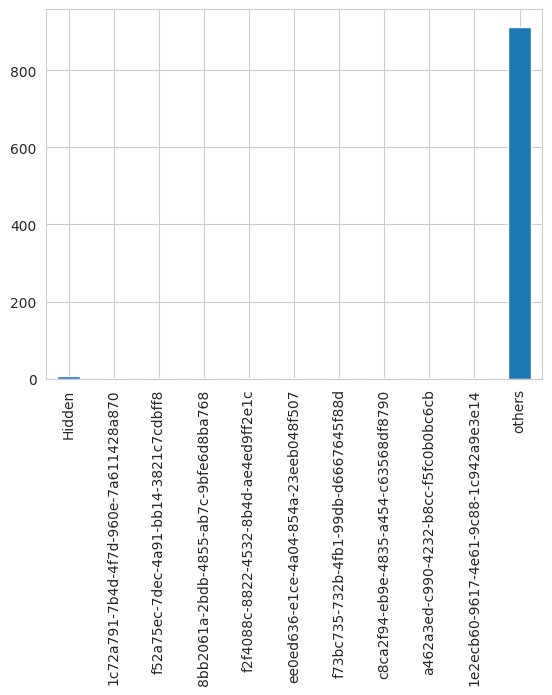

In [21]:
top_categories=data["Product_ID"].value_counts().head(10)
other=data["Product_ID"].value_counts().iloc[10:].sum()
top_categories['others']=other
top_categories.plot(kind='bar')
plt.show()
# from the graph we can see there a lot of hidden columns in the data so if we replace with mode

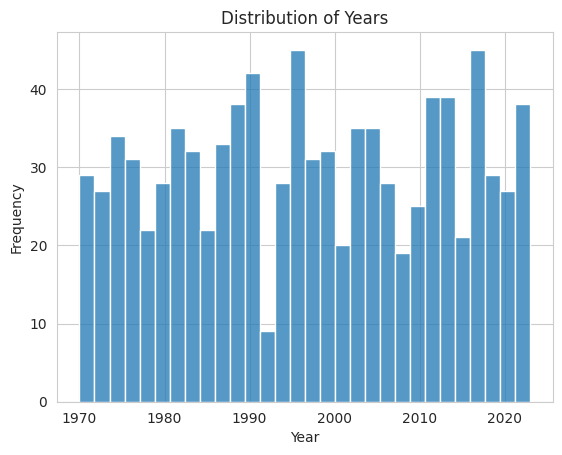

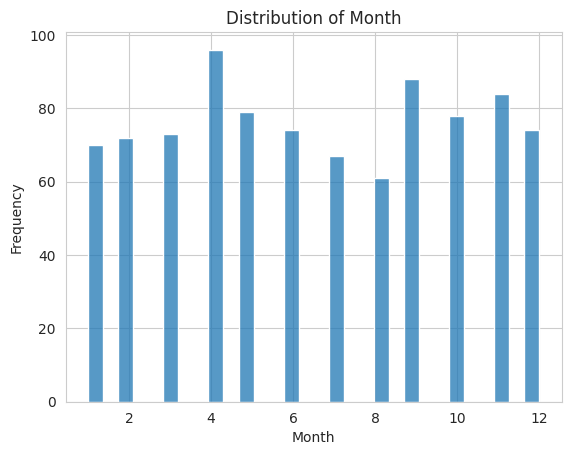

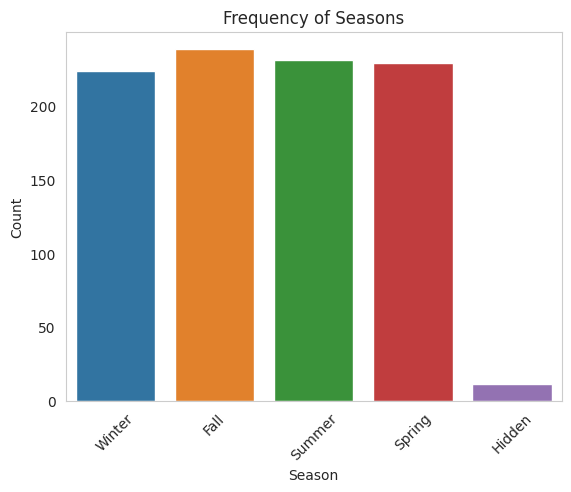

In [22]:
data.sort_values(by=["Year", "Month"], inplace=True)

data['Year']=pd.to_numeric(data['Year'],errors='coerce')
data['Month']=pd.to_numeric(data['Month'],errors='coerce')









sns.histplot(data['Year'], kde=False, bins=30)  # Adjust bins as needed

# Enhancing the plot
plt.title('Distribution of Years')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.grid(True)

# Show the plot
plt.show()


sns.histplot(data['Month'], kde=False, bins=30)  # Adjust bins as needed

# Enhancing the plot
plt.title('Distribution of Month')
plt.xlabel('Month')
plt.ylabel('Frequency')
plt.grid(True)

# Show the plot
plt.show()

data["Year"].fillna(method="ffill", inplace=True)
data["Month"].fillna(method="ffill", inplace=True)



sns.countplot(x='Season', data=data)

# Enhancing the plot
plt.title('Frequency of Seasons')
plt.xlabel('Season')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotating the x labels for better readability if needed
plt.grid(axis='y')  # Adding a grid for the y-axis

# Show the plot
plt.show()

data["Season"].fillna(data["Season"].mode()[0], inplace=True)



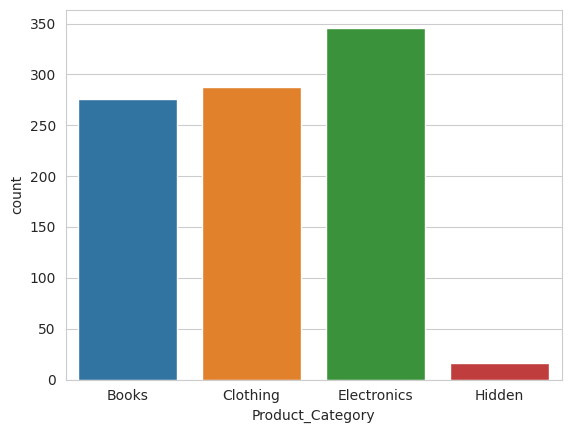

In [23]:
data["Product_Category"].value_counts()
sns.countplot(x="Product_Category",data=data)
plt.show()
data["Product_Category"].fillna(data["Product_Category"].mode()[0],inplace=True)


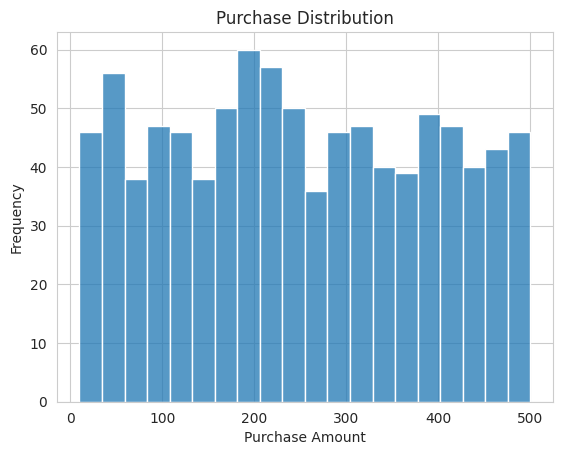

0.050353985332340596


In [24]:
# As Purchase is an integer value let's visualize first that how actually it looks like as it is skewed or not then we will decide whther we will
#replace them with median or mode
data['Purchase_Amount']=pd.to_numeric(data['Purchase_Amount'],errors='coerce')
sns.histplot(data['Purchase_Amount'],bins=20,kde=False)
plt.title("Purchase Distribution")
plt.xlabel("Purchase Amount")
plt.ylabel("Frequency")
plt.show()
print(data['Purchase_Amount'].skew())
#As we can view from the data that it is a little bit skewed on the right side(negatively skewed ) and by the value of skew() function
#we can say that we can use either mean or median both for the analysis
meanAge=data['Purchase_Amount'].mean()
data['Purchase_Amount'].fillna(meanAge,inplace=True)
# Now we have filled out the Age data let's move toward next data

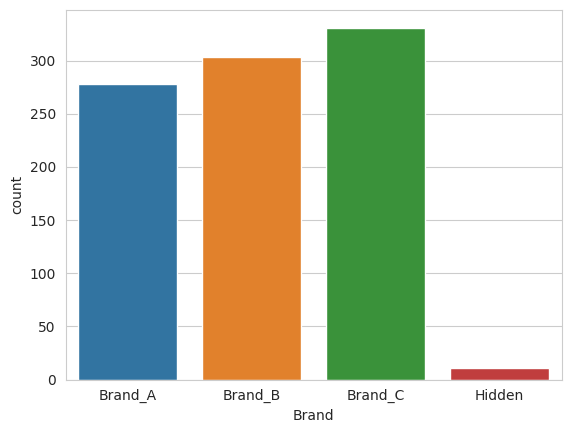

In [25]:
data["Brand"].value_counts()
sns.countplot(x="Brand",data=data)
plt.show()
data["Brand"].fillna(data["Brand"].mode()[0],inplace=True)
#we can see from the grapgh that we should replace Product_Category with the mod as hidden is not valuable to use that much right now

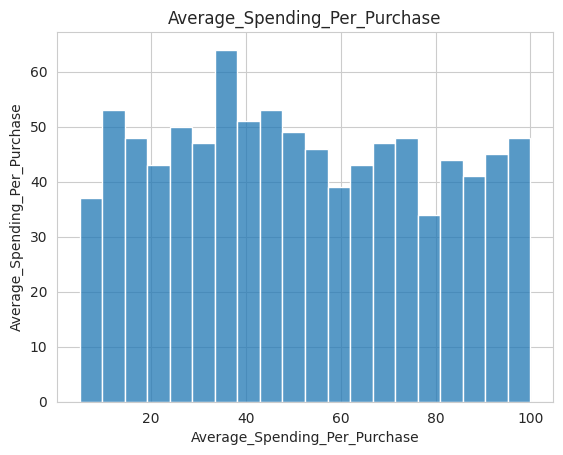

0.106167362108082


In [26]:
# As Purchase is an integer value let's visualize first that how actually it looks like as it is skewed or not then we will decide whther we will
#replace them with median or mode
data['Average_Spending_Per_Purchase']=pd.to_numeric(data['Average_Spending_Per_Purchase'],errors='coerce')
sns.histplot(data['Average_Spending_Per_Purchase'],bins=20,kde=False)
plt.title("Average_Spending_Per_Purchase")
plt.xlabel("Average_Spending_Per_Purchase")
plt.ylabel("Average_Spending_Per_Purchase")
plt.show()
print(data['Average_Spending_Per_Purchase'].skew())
#As we can view from the data that it is a little bit skewed on the right side(negatively skewed ) and by the value of skew() function
#we can say that we can use either mean or median both for the analysis
meanAge=data['Average_Spending_Per_Purchase'].mean()
data['Average_Spending_Per_Purchase'].fillna(meanAge,inplace=True)
# Now we have filled out the Age data let's move toward next data

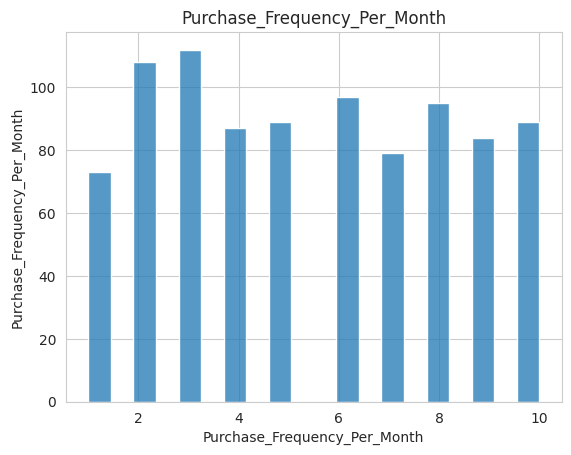

0.07916253336656894


In [27]:
data['Purchase_Frequency_Per_Month']
# As Purchase is an integer value let's visualize first that how actually it looks like as it is skewed or not then we will decide whther we will
#replace them with median or mode
data['Purchase_Frequency_Per_Month']=pd.to_numeric(data['Purchase_Frequency_Per_Month'],errors='coerce')
sns.histplot(data['Purchase_Frequency_Per_Month'],bins=20,kde=False)
plt.title("Purchase_Frequency_Per_Month")
plt.xlabel("Purchase_Frequency_Per_Month")
plt.ylabel("Purchase_Frequency_Per_Month")
plt.show()
print(data['Purchase_Frequency_Per_Month'].skew())
#As we can view from the data that it is a little bit skewed on the right side(negatively skewed ) and by the value of skew() function
#we can say that we can use either mean or median both for the analysis
meanAge=data['Purchase_Frequency_Per_Month'].mean()
data['Purchase_Frequency_Per_Month'].fillna(meanAge,inplace=True)
# Now we have filled out the Age data let's move toward next data

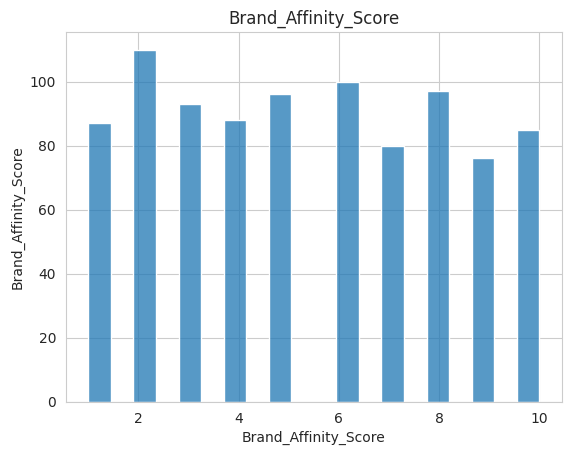

0.0717278173141317


In [28]:
data['Brand_Affinity_Score']
#replace them with median or mode
data['Brand_Affinity_Score']=pd.to_numeric(data['Brand_Affinity_Score'],errors='coerce')
sns.histplot(data['Brand_Affinity_Score'],bins=20,kde=False)
plt.title("Brand_Affinity_Score")
plt.xlabel("Brand_Affinity_Score")
plt.ylabel("Brand_Affinity_Score")
plt.show()
print(data['Brand_Affinity_Score'].skew())
#As we can view from the data that it is a little bit skewed on the right side(negatively skewed ) and by the value of skew() function
#we can say that we can use either mean or median both for the analysis
meanAge=data['Brand_Affinity_Score'].mean()
data['Brand_Affinity_Score'].fillna(meanAge,inplace=True)
# Now we have filled out the Age data let's move toward next data

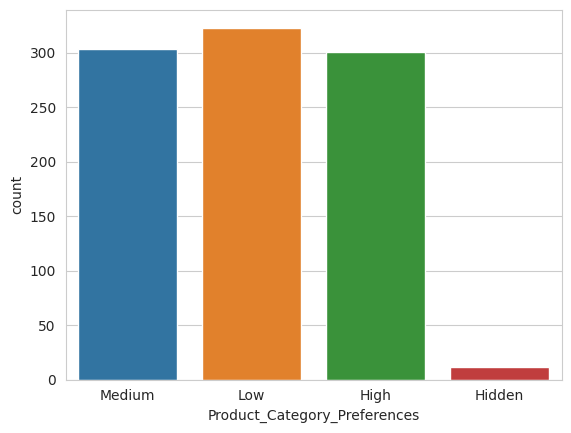

In [29]:
data['Product_Category_Preferences']
data["Product_Category_Preferences"].value_counts()
sns.countplot(x="Product_Category_Preferences",data=data)
plt.show()
data["Product_Category_Preferences"].fillna(data["Product_Category_Preferences"].mode()[0],inplace=True)
#we can see from the grapgh that we should replace Product_Category with the mod as hidden is not valuable to use that much right now

In [30]:
data.isna().sum()

Customer_ID                       0
Age                               0
Gender                            0
Income_Level                      0
Address                           0
Transaction_ID                   37
Purchase_Date                     0
Product_ID                       38
Product_Category                  0
Brand                             0
Purchase_Amount                   0
Average_Spending_Per_Purchase     0
Purchase_Frequency_Per_Month      0
Brand_Affinity_Score              0
Product_Category_Preferences      0
Month                             0
Year                              0
Season                            0
dtype: int64

In [31]:
#lets add new features to the data

In [32]:
# #let's standardize the data
scaler=StandardScaler()
# data['Age']=scaler.fit_transform(data[['Age']])

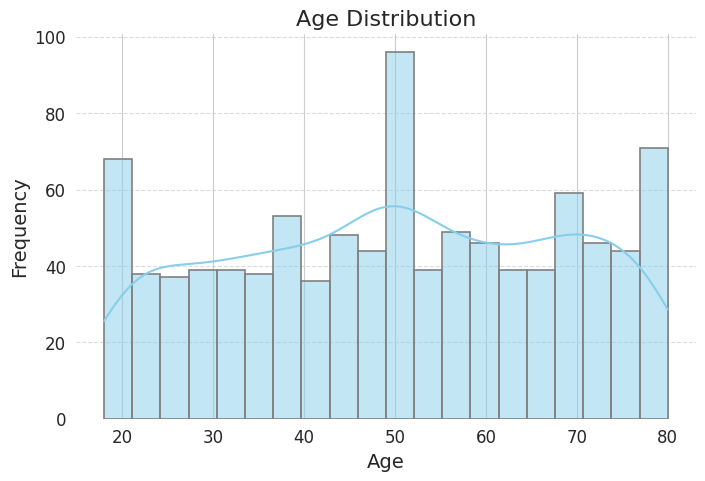

Desscriptive Statistics of Age
 count    968.000000
mean      49.920344
std       18.115112
min       18.000000
25%       35.000000
50%       49.920344
75%       66.000000
max       80.000000
Name: Age, dtype: float64


In [33]:
#Module 2
#Lets take a look at distribution of Age using histogran
#Distribution of Age
sns.set_style("whitegrid")


plt.figure(figsize=(8, 5))

# Plot the histogram with customized aesthetics
sns.histplot(data["Age"], bins=20, kde=True, color="skyblue", edgecolor="gray", linewidth=1.2)

# Add labels and a title
plt.xlabel("Age", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.title("Age Distribution", fontsize=16)

# Customize the tick labels
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add a grid for better readability
sns.despine(left=True, bottom=True)  # Remove the left and bottom spines
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Display the plot
plt.show()
print("Desscriptive Statistics of Age\n",data["Age"].describe())

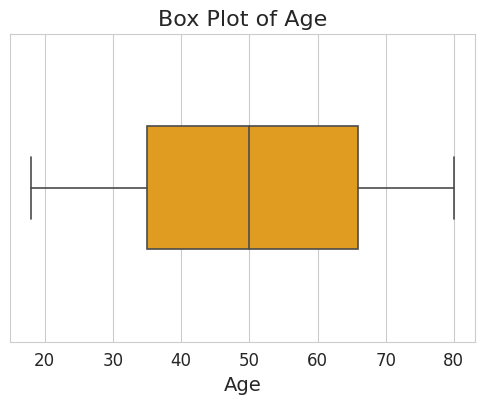

In [34]:
# Now let's take a lookt at box plot of age to identify the outliers
sns.set_style("whitegrid")

plt.figure(figsize=(6, 4))  # Adjust the figure size

# Plot the box plot
sns.boxplot(x=data["Age"], color="orange", width=0.4, linewidth=1.2)

# Add labels and a title
plt.xlabel("Age", fontsize=14)
plt.title("Box Plot of Age", fontsize=16)

# Customize the tick labels
plt.xticks(fontsize=12)

# Display the plot
plt.show()
#So no outliers lie in my age data


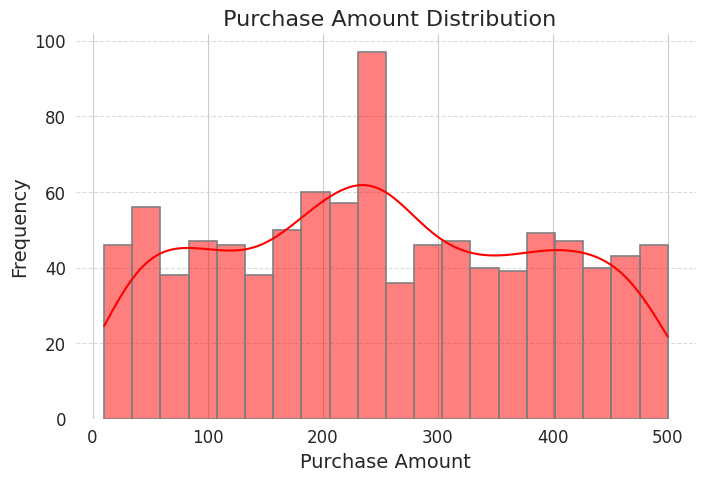

Desscriptive Statistics of Purchase Amount Distribution
 count    968.000000
mean     249.984799
std      137.378198
min       10.000000
25%      136.750000
50%      249.984799
75%      368.000000
max      500.000000
Name: Purchase_Amount, dtype: float64


In [35]:
#Purchase Amount
sns.set_style("whitegrid")


plt.figure(figsize=(8, 5))

# Plot the histogram with customized aesthetics
sns.histplot(data["Purchase_Amount"], bins=20, kde=True, color="red", edgecolor="gray", linewidth=1.2)

# Add labels and a title
plt.xlabel("Purchase Amount", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.title(" Purchase Amount Distribution", fontsize=16)

# Customize the tick labels
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add a grid for better readability
sns.despine(left=True, bottom=True)  # Remove the left and bottom spines
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Display the plot
plt.show()
print("Desscriptive Statistics of Purchase Amount Distribution\n",data["Purchase_Amount"].describe())

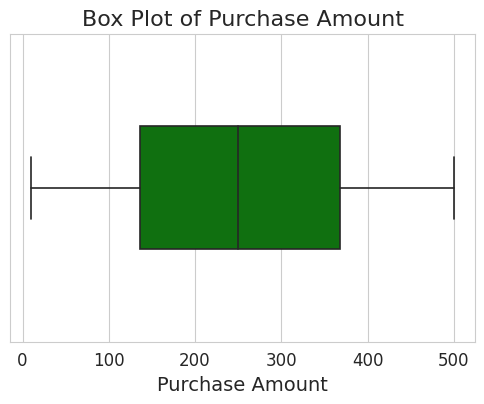

In [36]:
# Now let's take a lookt at box plot of age to identify the outliers
sns.set_style("whitegrid")

plt.figure(figsize=(6, 4))  # Adjust the figure size

# Plot the box plot
sns.boxplot(x=data["Purchase_Amount"], color="green", width=0.4, linewidth=1.2)

# Add labels and a title
plt.xlabel("Purchase Amount", fontsize=14)
plt.title("Box Plot of Purchase Amount", fontsize=16)

# Customize the tick labels
plt.xticks(fontsize=12)

# Display the plot
plt.show()
#So no outliers lie in my purchase amount distribution data

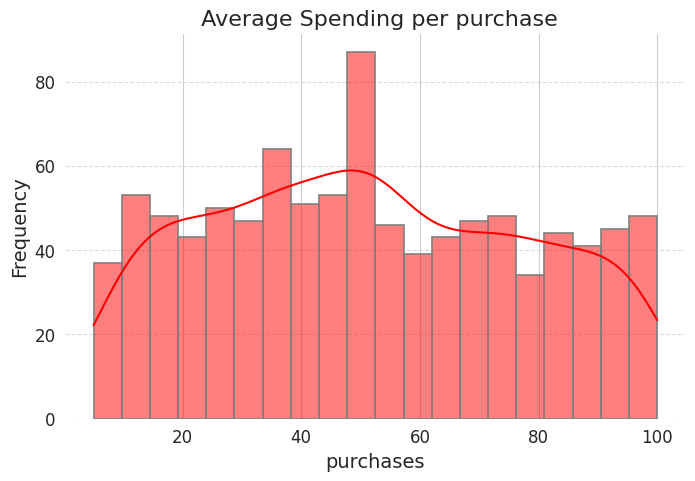

Desscriptive Statistics of Average Spendings per purchase
 count    968.000000
mean      51.435484
std       26.581257
min        5.000000
25%       29.000000
50%       51.000000
75%       73.000000
max      100.000000
Name: Average_Spending_Per_Purchase, dtype: float64


In [37]:
#Average Spending per purchase
sns.set_style("whitegrid")


plt.figure(figsize=(8, 5))

# Plot the histogram with customized aesthetics
sns.histplot(data["Average_Spending_Per_Purchase"], bins=20, kde=True, color="red", edgecolor="gray", linewidth=1.2)

# Add labels and a title
plt.xlabel("purchases", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.title(" Average Spending per purchase", fontsize=16)

# Customize the tick labels
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add a grid for better readability
sns.despine(left=True, bottom=True)  # Remove the left and bottom spines
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Display the plot
plt.show()

print("Desscriptive Statistics of Average Spendings per purchase\n",data["Average_Spending_Per_Purchase"].describe())

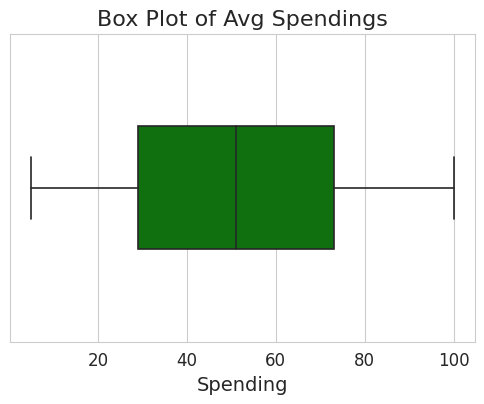

In [38]:
# Now let's take a lookt at box plot of age to identify the outliers
sns.set_style("whitegrid")

plt.figure(figsize=(6, 4))  # Adjust the figure size

# Plot the box plot
sns.boxplot(x=data["Average_Spending_Per_Purchase"], color="green", width=0.4, linewidth=1.2)

# Add labels and a title
plt.xlabel("Spending", fontsize=14)
plt.title("Box Plot of Avg Spendings", fontsize=16)

# Customize the tick labels
plt.xticks(fontsize=12)

# Display the plot
plt.show()
#So no outliers lie in my Average Spendings distribution data

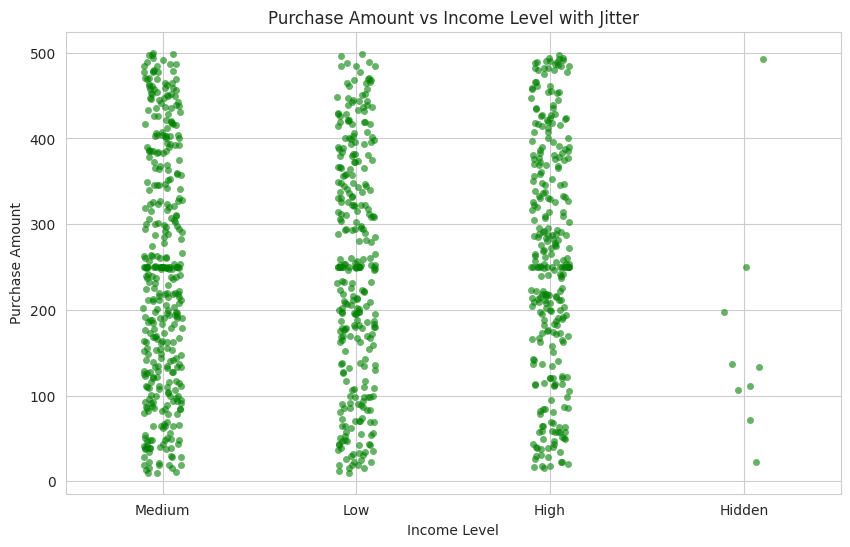

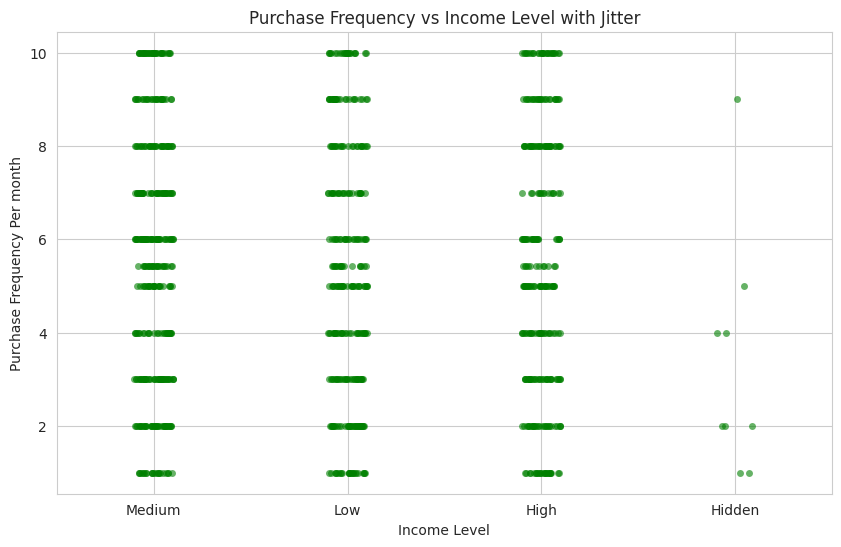

Customer_ID                       0
Age                               0
Gender                            0
Income_Level                      0
Address                           0
Transaction_ID                   37
Purchase_Date                     0
Product_ID                       38
Product_Category                  0
Brand                             0
Purchase_Amount                   0
Average_Spending_Per_Purchase     0
Purchase_Frequency_Per_Month      0
Brand_Affinity_Score              0
Product_Category_Preferences      0
Month                             0
Year                              0
Season                            0
dtype: int64

In [39]:
#Module2
#Bivariarte Variables
#Lets visualize the relationship between purchase amount and income level
#scatter plot with jitter
plt.figure(figsize=(10, 6))
sns.stripplot(data=data, x='Income_Level', y='Purchase_Amount',color='green', jitter=0.1, size=5, alpha=0.6)
plt.title('Purchase Amount vs Income Level with Jitter')
plt.xlabel('Income Level')
plt.ylabel('Purchase Amount')
plt.grid(True)
plt.show()


plt.figure(figsize=(10, 6))
sns.stripplot(data=data, x='Income_Level', y='Purchase_Frequency_Per_Month',color='green', jitter=0.1, size=5, alpha=0.6)
plt.title('Purchase Frequency vs Income Level with Jitter')
plt.xlabel('Income Level')
plt.ylabel('Purchase Frequency Per month')
plt.grid(True)
plt.show()

data.isna().sum()




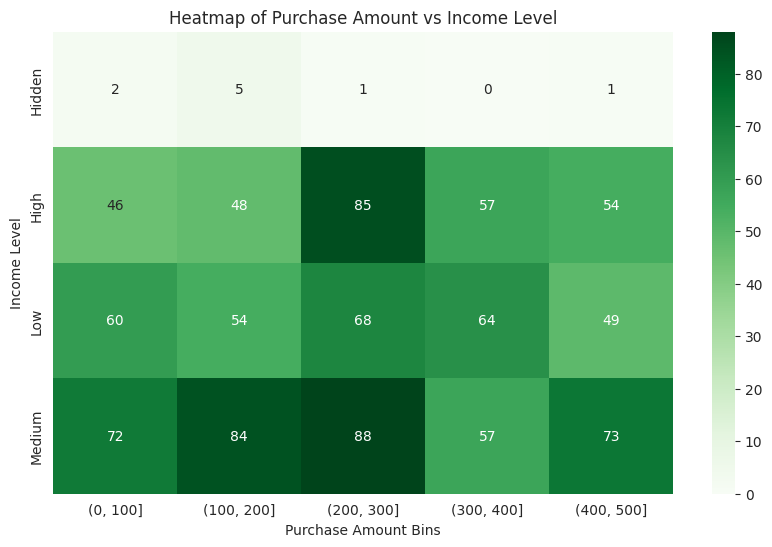

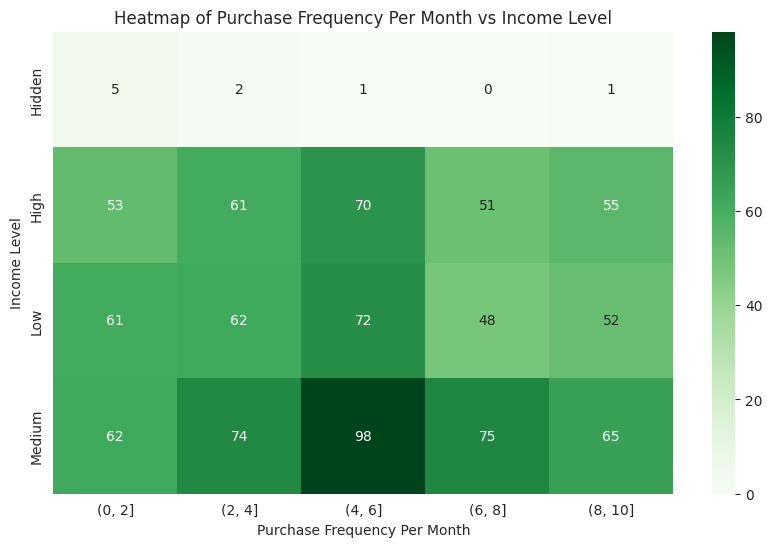

In [40]:
#now let's take a lookt at heatmap  for purchase_amount vs Income_Level
purchase_amount_bins = pd.cut(data['Purchase_Amount'], bins=[0, 100, 200, 300, 400, 500])

# Then, create a pivot table counting the number of purchases within each bin for each 'Income_Level'
pivot_table = data.pivot_table(index='Income_Level', columns=purchase_amount_bins, aggfunc='size', fill_value=0)

# Now, you can plot the heatmap using seaborn
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, fmt="d", cmap="Greens")
plt.title('Heatmap of Purchase Amount vs Income Level')
plt.ylabel('Income Level')
plt.xlabel('Purchase Amount Bins')
plt.show()




#now let's take a lookt at heatmap  for purchase_amount vs Income_Level
purchase_amount_bins = pd.cut(data['Purchase_Frequency_Per_Month'], bins=[0, 2, 4, 6, 8, 10])

# Then, create a pivot table counting the number of purchases within each bin for each 'Income_Level'
pivot_table = data.pivot_table(index='Income_Level', columns=purchase_amount_bins, aggfunc='size', fill_value=0)

# Now, you can plot the heatmap using seaborn
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, fmt="d", cmap="Greens")
plt.title('Heatmap of Purchase Frequency Per Month vs Income Level')
plt.ylabel('Income Level')
plt.xlabel('Purchase Frequency Per Month')
plt.show()



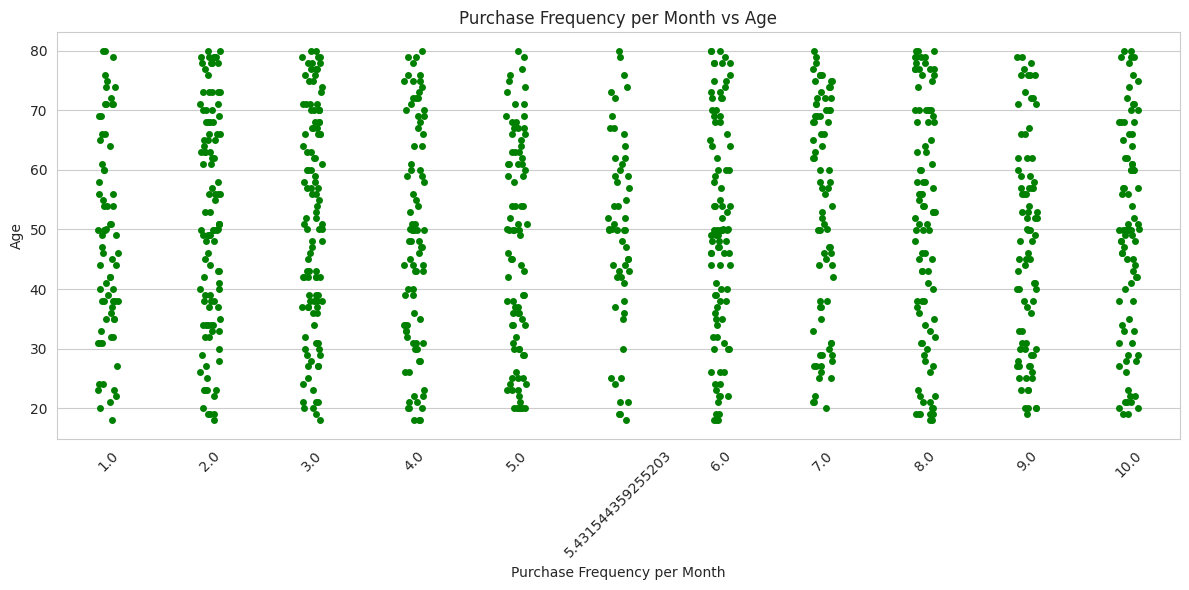

In [41]:
#Lets visualize the relationship between purchase frequency_per_month and Age

plt.figure(figsize=(12, 6))
sns.stripplot(data=data, x='Purchase_Frequency_Per_Month', y='Age',color='green', jitter=0.1)  # Add jitter to avoid overlap

# Rotate labels if needed
plt.xticks(rotation=45)

plt.xlabel('Purchase Frequency per Month')
plt.ylabel('Age')
plt.title('Purchase Frequency per Month vs Age')
plt.tight_layout()  # Adjust the layout
plt.show()

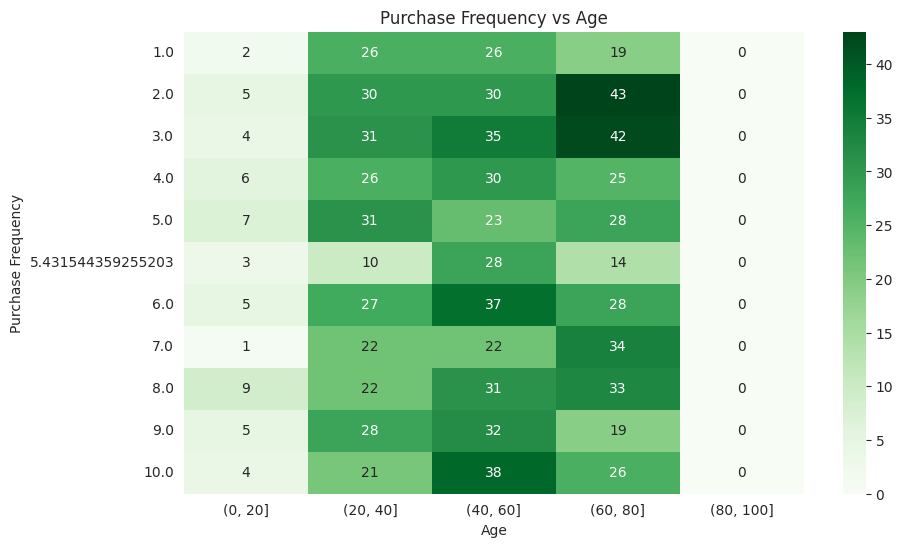

In [42]:
#now let's take a lookt at heatmap  for Purchase Frequency_Per_month vs Age
purchase_amount_bins = pd.cut(data['Age'], bins=[0, 20, 40, 60, 80, 100])

# Then, create a pivot table counting the number of purchases within each bin for each 'Income_Level'
pivot_table = data.pivot_table(index='Purchase_Frequency_Per_Month', columns=purchase_amount_bins, aggfunc='size', fill_value=0)

# Now, you can plot the heatmap using seaborn
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, fmt="d", cmap="Greens")
plt.title('Purchase Frequency vs Age')
plt.ylabel('Purchase Frequency')
plt.xlabel('Age')
plt.show()

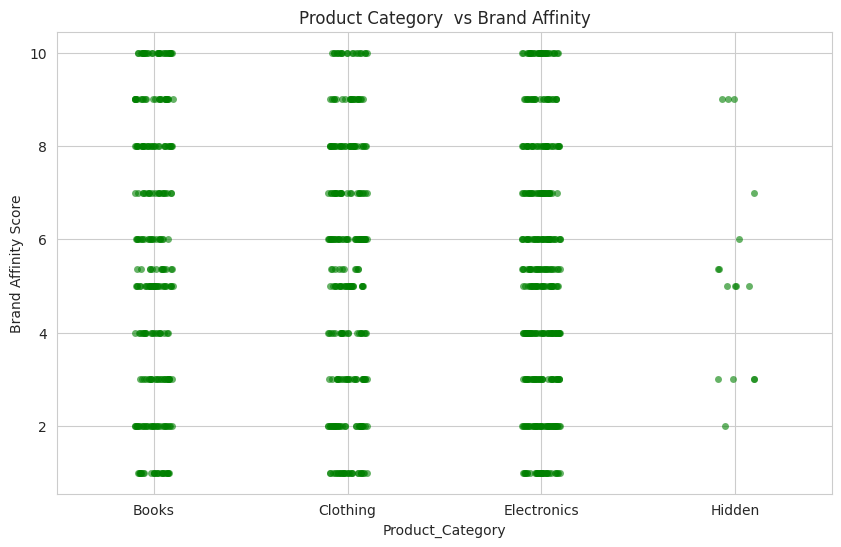

In [43]:
#Lets visualize the relationship between Brand_Affinity and Product Category
plt.figure(figsize=(10, 6))
sns.stripplot(data=data, x='Product_Category', y='Brand_Affinity_Score',color='green', jitter=0.1, size=5, alpha=0.6)
plt.title('Product Category  vs Brand Affinity')
plt.xlabel('Product_Category')
plt.ylabel('Brand Affinity Score')
plt.grid(True)
plt.show()




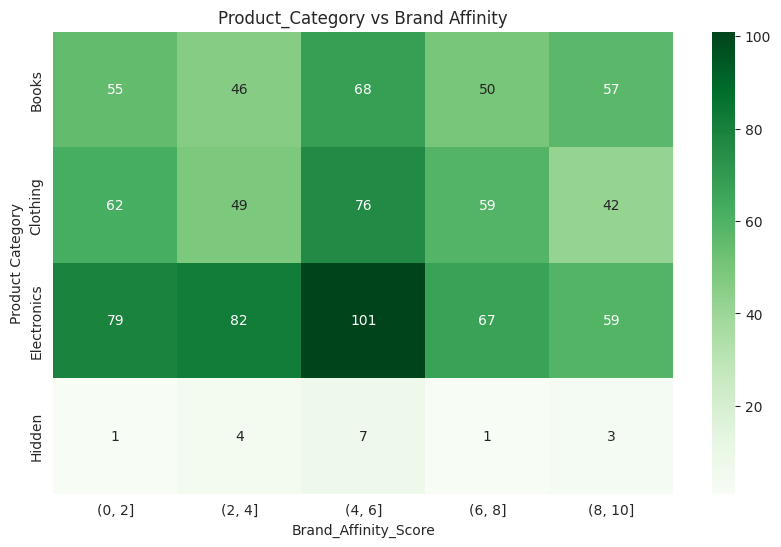

In [44]:
#now let's take a lookt at heatmap  for Brand_Affinity _Score vs Product_Category
purchase_amount_bins = pd.cut(data['Brand_Affinity_Score'], bins=[0, 2, 4, 6, 8, 10])

# Then, create a pivot table counting the number of purchases within each bin for each 'Income_Level'
pivot_table = data.pivot_table(index='Product_Category', columns=purchase_amount_bins, aggfunc='size', fill_value=0)

# Now, you can plot the heatmap using seaborn
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, fmt="d", cmap="Greens")
plt.title('Product_Category vs Brand Affinity')
plt.ylabel('Product Category')
plt.xlabel('Brand_Affinity_Score')
plt.show()







In [45]:
columns_for_corr = ['Purchase_Amount', 'Brand_Affinity_Score', 'Age']

# Calculate the correlation matrix
correlation_matrix = data[columns_for_corr].corr()
correlation_matrix



Purchase_Amount  Brand_Affinity_Score       Age
Purchase_Amount              1.000000              0.025486  0.009256
Brand_Affinity_Score         0.025486              1.000000  0.015002
Age                          0.009256              0.015002  1.000000

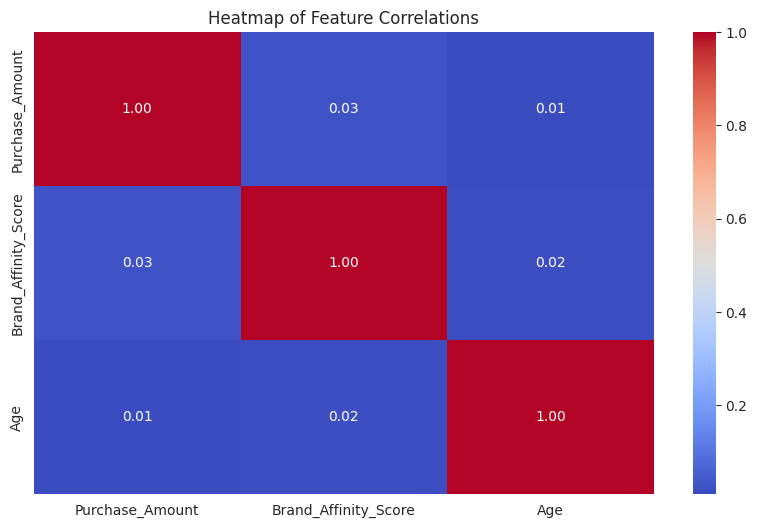

In [46]:
plt.figure(figsize=(10,6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Heatmap of Feature Correlations')
plt.show()

In [47]:
#Part 2
#Module 3
data.isna().sum()

Customer_ID                       0
Age                               0
Gender                            0
Income_Level                      0
Address                           0
Transaction_ID                   37
Purchase_Date                     0
Product_ID                       38
Product_Category                  0
Brand                             0
Purchase_Amount                   0
Average_Spending_Per_Purchase     0
Purchase_Frequency_Per_Month      0
Brand_Affinity_Score              0
Product_Category_Preferences      0
Month                             0
Year                              0
Season                            0
dtype: int64

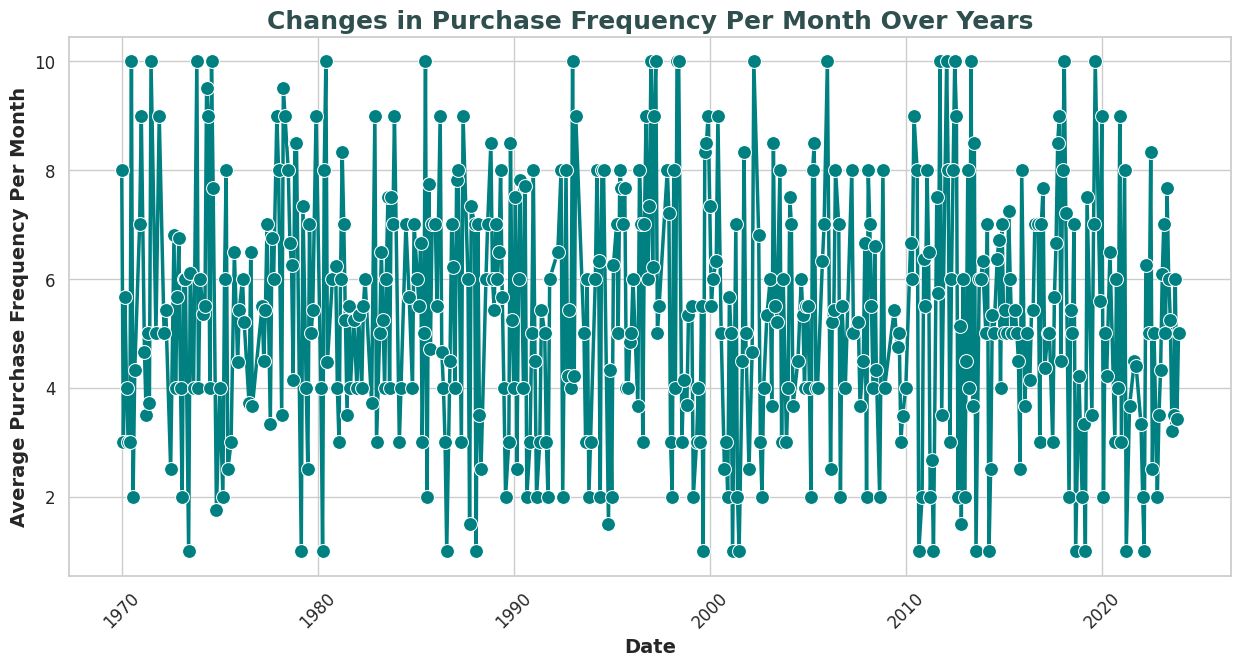

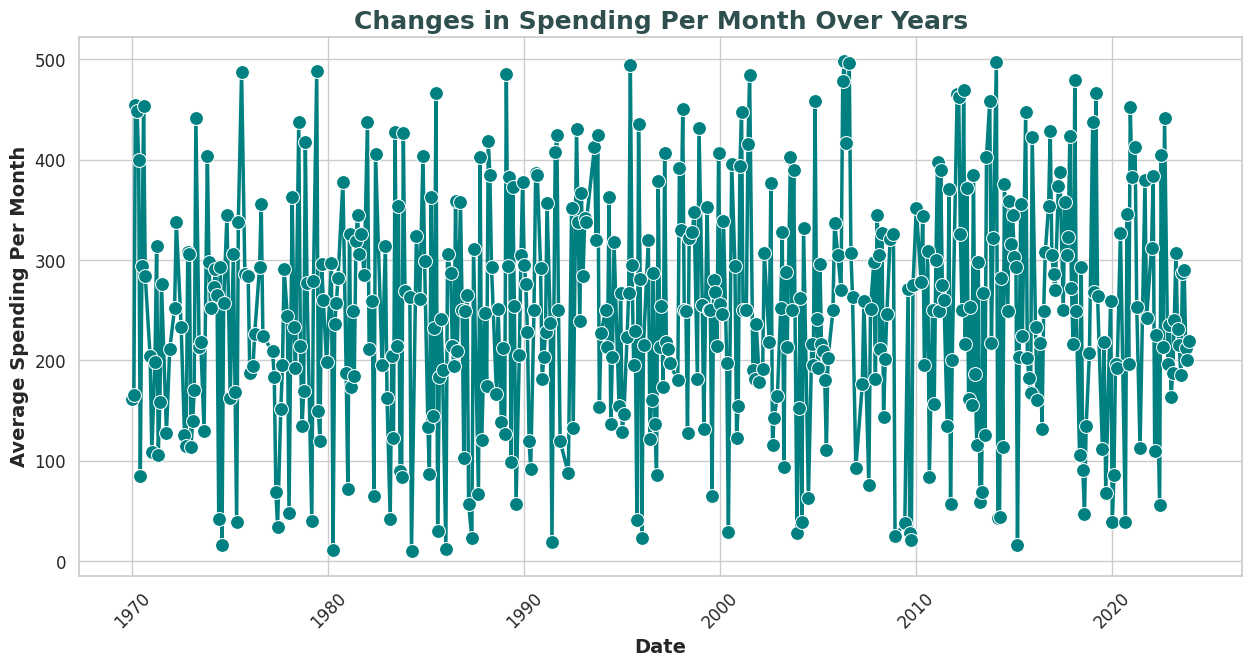

In [48]:
grouped_data = data.groupby(['Year', 'Month']).agg({'Purchase_Frequency_Per_Month': 'mean'}).reset_index()

grouped_data['Date'] = pd.to_datetime(grouped_data[['Year', 'Month']].assign(DAY=1))



sns.set(style="whitegrid")

plt.figure(figsize=(15, 7))
sns.lineplot(x='Date', y='Purchase_Frequency_Per_Month', data=grouped_data,
             marker='o', color='teal', markersize=10, linewidth=2.5)
plt.title('Changes in Purchase Frequency Per Month Over Years', fontsize=18, fontweight='bold', color='darkslategray')
plt.xlabel('Date', fontsize=14, fontweight='bold')
plt.ylabel('Average Purchase Frequency Per Month', fontsize=14, fontweight='bold')

plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

plt.show()


grouped_data1 = data.groupby(['Year', 'Month']).agg({'Purchase_Amount': 'mean'}).reset_index()

grouped_data1['Date'] = pd.to_datetime(grouped_data[['Year', 'Month']].assign(DAY=1))

sns.set(style="whitegrid")

plt.figure(figsize=(15, 7))
sns.lineplot(x='Date', y='Purchase_Amount', data=grouped_data1,
             marker='o', color='teal', markersize=10, linewidth=2.5)
plt.title('Changes in Spending Per Month Over Years', fontsize=18, fontweight='bold', color='darkslategray')
plt.xlabel('Date', fontsize=14, fontweight='bold')
plt.ylabel('Average Spending Per Month', fontsize=14, fontweight='bold')

plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

plt.show()





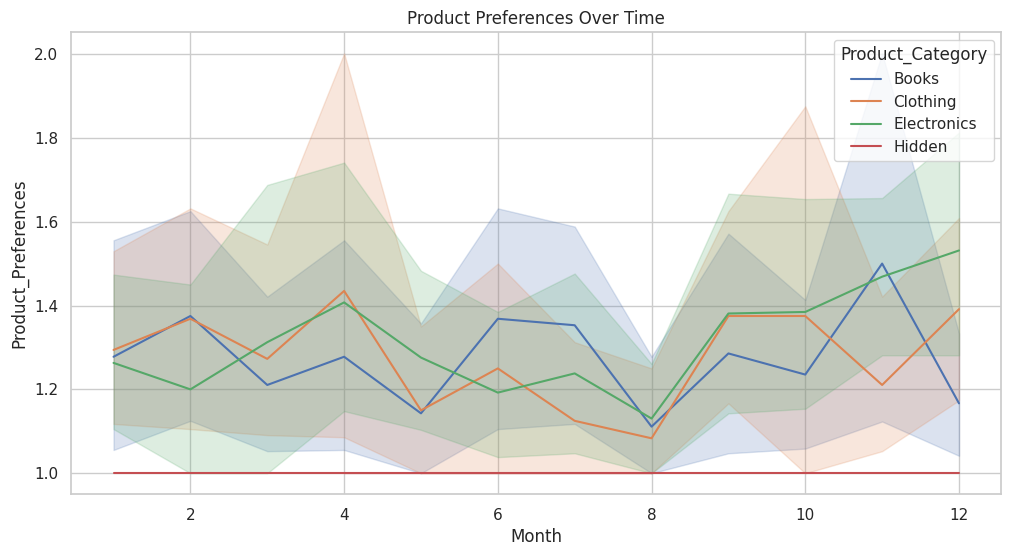

In [49]:

product_preferences_by_month = data.groupby(['Year', 'Month', 'Product_Category']).size().reset_index(name='Product_Preferences')


# Visualize product preferences over time
plt.figure(figsize=(12, 6))
sns.lineplot(x='Month', y='Product_Preferences', hue='Product_Category', data=product_preferences_by_month)
plt.title('Product Preferences Over Time')
plt.show()

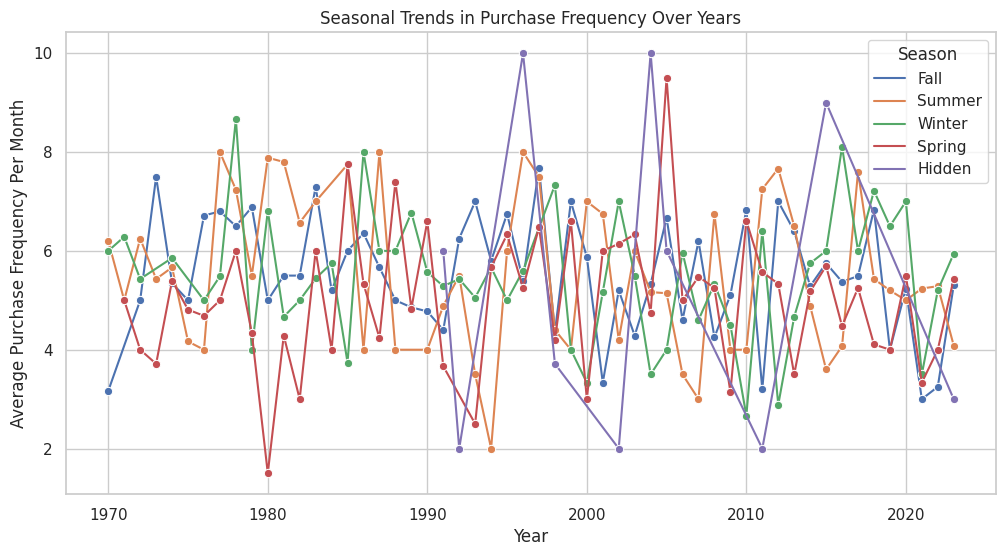

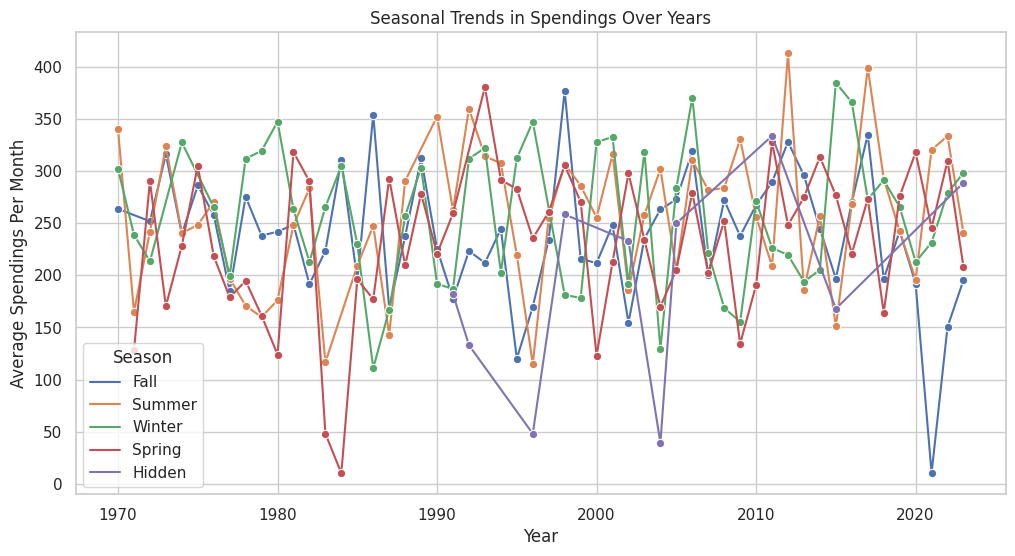

In [50]:
grouped_data = data.groupby(['Year', 'Season']).agg({'Purchase_Frequency_Per_Month': 'mean'}).reset_index()

# Creating the line plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=grouped_data, x='Year', y='Purchase_Frequency_Per_Month', hue='Season', marker='o')

plt.title('Seasonal Trends in Purchase Frequency Over Years')
plt.xlabel('Year')
plt.ylabel('Average Purchase Frequency Per Month')
plt.legend(title='Season')
plt.grid(True)
plt.show()




grouped_data = data.groupby(['Year', 'Season']).agg({'Purchase_Amount': 'mean'}).reset_index()

# Creating the line plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=grouped_data, x='Year', y='Purchase_Amount', hue='Season', marker='o')

plt.title('Seasonal Trends in Spendings Over Years')
plt.xlabel('Year')
plt.ylabel('Average Spendings Per Month')
plt.legend(title='Season')
plt.grid(True)
plt.show()

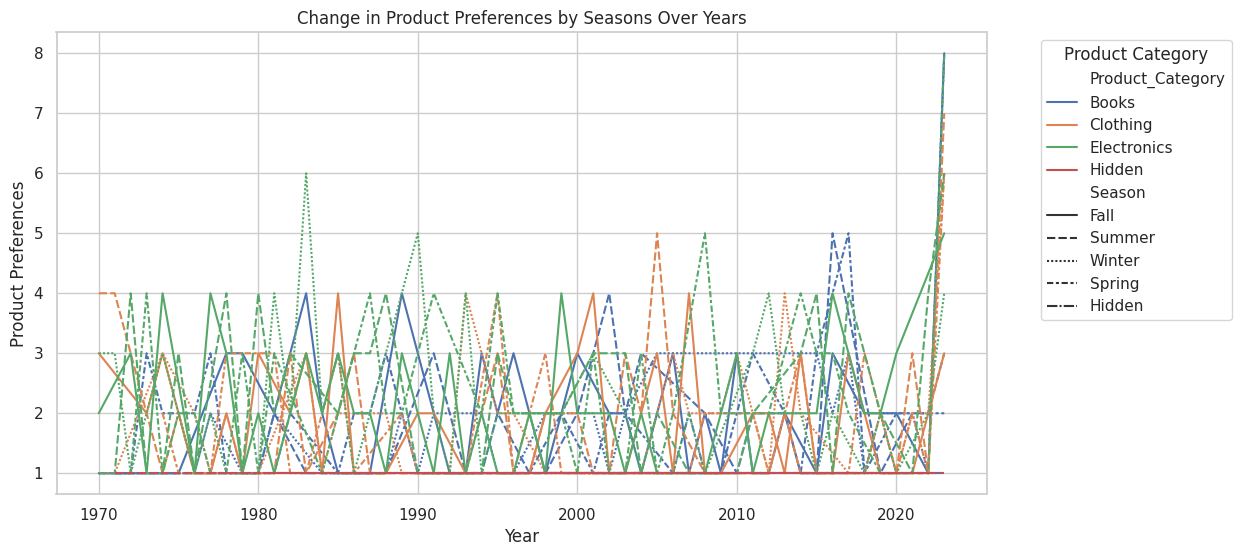

In [51]:

product_preferences_by_season = data.groupby(['Year', 'Season', 'Product_Category']).size().reset_index(name='Product_Preferences')


plt.figure(figsize=(12, 6))

sns.lineplot(x='Year', y='Product_Preferences', hue='Product_Category', style='Season', data=product_preferences_by_season)

plt.title('Change in Product Preferences by Seasons Over Years')
plt.xlabel('Year')
plt.ylabel('Product Preferences')
plt.legend(title='Product Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

In [52]:
#Module 3
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
data.head(10)
data.describe()
df = data

In [53]:
scaler = MinMaxScaler()

# Scale and transform numeric data
df[['Age', 'Purchase_Amount', 'Average_Spending_Per_Purchase', 'Purchase_Frequency_Per_Month', 'Brand_Affinity_Score', 'Month', 'Year']] = scaler.fit_transform(df[['Age', 'Purchase_Amount', 'Average_Spending_Per_Purchase', 'Purchase_Frequency_Per_Month', 'Brand_Affinity_Score', 'Month', 'Year']])


In [54]:
df_encoded = pd.get_dummies(df['Product_Category_Preferences'], prefix='Pref')
df_encoded


Pref_Hidden  Pref_High  Pref_Low  Pref_Medium
968            0          0         0            1
688            0          0         1            0
210            0          0         0            1
97             0          0         0            1
391            0          0         0            1
..           ...        ...       ...          ...
962            0          0         1            0
905            0          0         1            0
879            0          0         1            0
768            0          0         1            0
431            0          1         0            0

[968 rows x 4 columns]

In [55]:
df = df.drop('Product_Category_Preferences', axis=1)



In [56]:
df = df.join(df_encoded)

In [57]:
df.head(4)

df_combined = np.hstack((df[['Age', 'Purchase_Amount', 'Average_Spending_Per_Purchase', 'Purchase_Frequency_Per_Month', 'Brand_Affinity_Score', 'Month', 'Year']], df[['Pref_Hidden', 'Pref_High', 'Pref_Low', 'Pref_Medium']].values))
range_clusters = range(1, 11)

wcss = []
for k in range_clusters:
    # Using 'random' for cluster initialization
    kmeans = KMeans(n_clusters=k, init='random', max_iter=300, n_init=10, random_state=0)

    # Fit KMeans on the scaled features (without modifying the original DataFrame)
    kmeans.fit(scaler.fit_transform(df_combined))

    # Append WCSS to the list
    wcss.append(kmeans.inertia_)


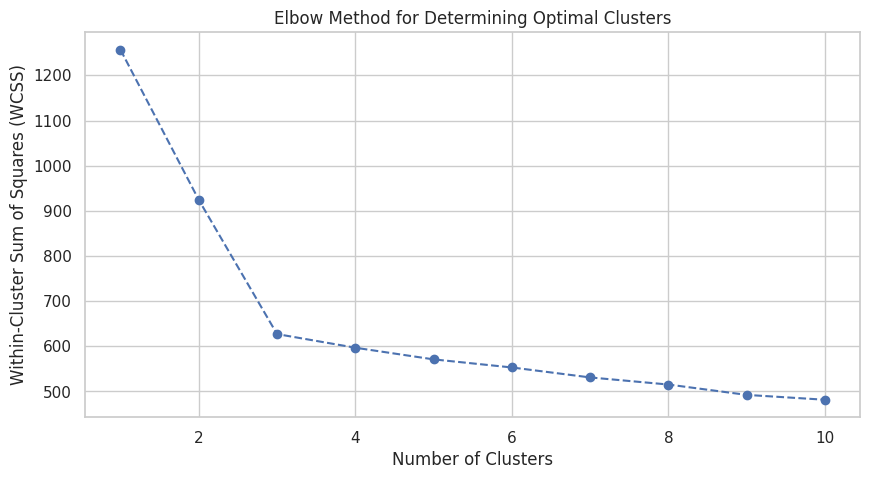

In [58]:

plt.figure(figsize=(10, 5))
plt.plot(range_clusters, wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Determining Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.show()


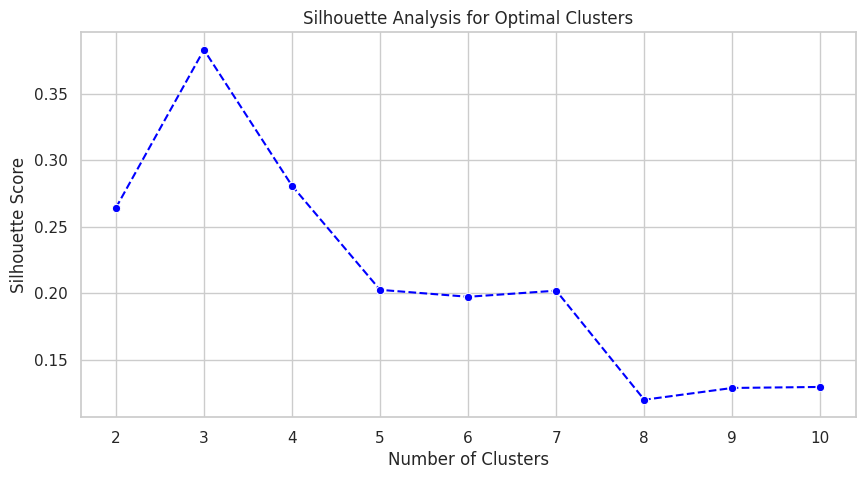

In [59]:
from sklearn.metrics import silhouette_samples
range_clusters = range(2, 11)

silhouette_scores = []


for k in range_clusters:

    kmeans = KMeans(n_clusters=k, init='random', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(scaler.fit_transform(df_combined))
    labels = kmeans.labels_

    # Calculate silhouette scores
    silhouette_avg = silhouette_samples(df_combined, labels).mean()
    silhouette_scores.append(silhouette_avg)

# Plotting silhouette scores
plt.figure(figsize=(10, 5))
sns.lineplot(x=range_clusters, y=silhouette_scores, marker='o', linestyle='--', color='blue')
plt.title('Silhouette Analysis for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

In [60]:
df

Customer_ID       Age  Gender Income_Level  \
968  fcfb43b9-0480-4917-9da8-6e17c884d83f  0.403226  Female       Medium   
688  a455f76c-cf6f-4cd6-9837-95250f45cd01  0.693548   Other          Low   
210  4697137e-18c0-4b48-9d23-5a967e774af4  0.758065    Male         High   
97   7c76c5e0-918a-4106-a814-631d64872c3b  0.806452    Male         High   
391  87977cfd-8c43-47db-9533-4ce6d9e0b4a7  0.112903   Other          Low   
..                                    ...       ...     ...          ...   
962  0381c7a9-538b-4b59-8627-70965c20dc01  0.419355  Female         High   
905  6780d84e-4042-4414-8b5b-c6efef2a1f2f  0.514844   Other         High   
879  054661cc-30fe-43da-8f0d-e1c953242906  0.483871  Female          Low   
768  bdf0d341-54de-4fef-ae6c-7cc4bdc51ebb  0.758065  Female          Low   
431  4c50ad37-3d97-4cbe-a6d5-42e70baf6271  0.064516   Other       Medium   

                                               Address  \
968         99119 Richard Courts\nLake Mario, IN 71899   
688             2359 Mendez Point\nBriantown, AR 71911   
210                                            Unknown   
97   1271 Marilyn Orchard Suite 839\nPort Tinaport,...   
391  35107 Terry Tunnel Apt. 014\nCatherineborough,...   
..                                                 ...   
962      094 Deborah Dale\nNorth Jessicafort, AR 44263   
905         047 Buck Villages\nCurtisborough, MD 92070   
879        6813 Angela Ferry\nWilliamsonview, MI 96013   
768  01193 Howard Corners\nSouth Brandonfort, NE 11648   
431                                             Hidden   

                           Transaction_ID Purchase_Date  \
968  673296a4-b23d-4a36-9e90-e41b1164f025    2020-10-22   
688  2236855c-d6f6-4d63-9b76-3a07059933df    2021-11-26   
210  30ef54cd-6a57-4712-85e3-321035d63c48    2022-05-29   
97   64e78933-0a6f-4ad7-aec8-be304b411437    2020-05-21   
391  e82f7a98-465f-4ab2-b5dd-4d97c6809f43    2023-01-13   
..                                    ...           ...   
962  45c6b6f5-f3d1-4ed5-9652-012ae17d708d    2023-03-31   
905  815d6a24-1a75-4e87-a724-98d4a15e69dc    2023-06-03   
879  98e419b4-9d13-441e-8458-9743d4048557    2022-08-19   
768  03940fe5-c418-4dcb-826e-5ced2f8b101b    2023-03-19   
431  28df5404-d632-43a7-9735-3dbf1c5e7162    2022-01-28   

                               Product_ID Product_Category    Brand  ...  \
968  e56c5b9c-cd45-42de-a92c-2cc451958e6a            Books  Brand_A  ...   
688  42e75e81-4e7f-465a-96ff-49de5ff1dd5b         Clothing  Brand_A  ...   
210  1eacb3e7-d49a-4b6d-9c4a-978c58919117         Clothing  Brand_A  ...   
97   a5b9a371-7240-4720-a2f8-a3662983e713         Clothing  Brand_B  ...   
391  3e510b79-6a33-4c10-88c4-32c4d306abfd         Clothing  Brand_C  ...   
..                                    ...              ...      ...  ...   
962  5b8d71f4-9a85-42ea-aa9d-73b9efd43aa5         Clothing  Brand_B  ...   
905  21552b62-8e1e-49c5-92a1-8baf0b98f211            Books  Brand_B  ...   
879  f23a8e1b-92a7-458e-a03e-247f13715d58         Clothing  Brand_B  ...   
768  ef66009e-ca68-4955-b35f-56332ea8ff5b      Electronics  Brand_B  ...   
431  abd6f5f0-697f-4cd3-8804-eb9655638880      Electronics  Brand_B  ...   

     Average_Spending_Per_Purchase  Purchase_Frequency_Per_Month  \
968                       0.115789                      0.777778   
688                       0.621053                      0.000000   
210                       0.884211                      0.444444   
97                        0.873684                      0.444444   
391                       0.557895                      0.666667   
..                             ...                           ...   
962                       0.115789                      0.000000   
905                       0.305263                      0.000000   
879                       0.800000                      0.777778   
768                       0.473684                      0.111111   
431                       0.642105                

In [61]:
kmeans = KMeans(n_clusters=3, init='random', max_iter=300, n_init=10, random_state=0)
kmeans.fit(scaler.fit_transform(df_combined))
labels = kmeans.labels_

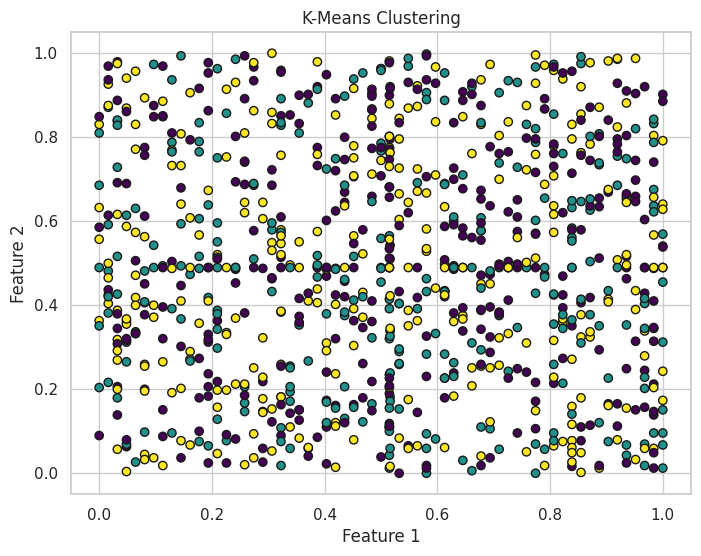

In [62]:
plt.figure(figsize=(8, 6))
plt.scatter(df_combined[:, 0], df_combined[:, 1], c=labels, cmap='viridis', edgecolor='k')
plt.title('K-Means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [63]:
y_predicted = kmeans.fit_predict(df_combined)

In [64]:
y_predicted

array([2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 0, 1, 0, 0, 2, 1, 2, 2, 0, 1, 1, 1,
       2, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 2, 0, 0, 1, 1, 2, 1, 0, 2, 0,
       2, 2, 0, 2, 2, 1, 2, 1, 2, 0, 2, 0, 0, 2, 0, 0, 2, 0, 1, 2, 1, 2,
       0, 0, 1, 1, 0, 1, 2, 2, 1, 0, 2, 2, 1, 2, 2, 1, 1, 0, 1, 0, 2, 2,
       2, 0, 0, 2, 2, 0, 0, 0, 1, 0, 0, 0, 0, 2, 1, 0, 0, 1, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 0, 2, 2, 2, 1, 2, 2, 2, 0, 2, 2, 2, 0, 1, 1, 2, 0,
       2, 2, 0, 1, 2, 0, 1, 2, 0, 1, 0, 2, 1, 2, 1, 2, 2, 1, 1, 1, 1, 1,
       2, 0, 0, 2, 0, 2, 0, 1, 2, 2, 2, 0, 2, 2, 2, 1, 0, 0, 2, 2, 0, 0,
       0, 2, 1, 2, 0, 2, 0, 2, 2, 0, 2, 0, 0, 1, 0, 1, 2, 0, 1, 1, 2, 2,
       2, 2, 0, 0, 0, 1, 1, 0, 1, 0, 2, 1, 1, 0, 2, 2, 1, 0, 0, 1, 2, 0,
       2, 2, 2, 1, 1, 1, 2, 1, 1, 0, 2, 0, 1, 0, 2, 0, 0, 2, 1, 0, 2, 0,
       2, 1, 0, 1, 2, 1, 0, 0, 0, 2, 1, 1, 1, 1, 2, 2, 0, 1, 2, 1, 0, 0,
       2, 2, 0, 0, 1, 0, 2, 0, 0, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 0, 1, 2,
       0, 2, 0, 0, 1, 2, 2, 0, 1, 1, 2, 2, 2, 1, 2,

In [65]:
df['clusters'] = y_predicted

In [66]:
df

Customer_ID       Age  Gender Income_Level  \
968  fcfb43b9-0480-4917-9da8-6e17c884d83f  0.403226  Female       Medium   
688  a455f76c-cf6f-4cd6-9837-95250f45cd01  0.693548   Other          Low   
210  4697137e-18c0-4b48-9d23-5a967e774af4  0.758065    Male         High   
97   7c76c5e0-918a-4106-a814-631d64872c3b  0.806452    Male         High   
391  87977cfd-8c43-47db-9533-4ce6d9e0b4a7  0.112903   Other          Low   
..                                    ...       ...     ...          ...   
962  0381c7a9-538b-4b59-8627-70965c20dc01  0.419355  Female         High   
905  6780d84e-4042-4414-8b5b-c6efef2a1f2f  0.514844   Other         High   
879  054661cc-30fe-43da-8f0d-e1c953242906  0.483871  Female          Low   
768  bdf0d341-54de-4fef-ae6c-7cc4bdc51ebb  0.758065  Female          Low   
431  4c50ad37-3d97-4cbe-a6d5-42e70baf6271  0.064516   Other       Medium   

                                               Address  \
968         99119 Richard Courts\nLake Mario, IN 71899   
688             2359 Mendez Point\nBriantown, AR 71911   
210                                            Unknown   
97   1271 Marilyn Orchard Suite 839\nPort Tinaport,...   
391  35107 Terry Tunnel Apt. 014\nCatherineborough,...   
..                                                 ...   
962      094 Deborah Dale\nNorth Jessicafort, AR 44263   
905         047 Buck Villages\nCurtisborough, MD 92070   
879        6813 Angela Ferry\nWilliamsonview, MI 96013   
768  01193 Howard Corners\nSouth Brandonfort, NE 11648   
431                                             Hidden   

                           Transaction_ID Purchase_Date  \
968  673296a4-b23d-4a36-9e90-e41b1164f025    2020-10-22   
688  2236855c-d6f6-4d63-9b76-3a07059933df    2021-11-26   
210  30ef54cd-6a57-4712-85e3-321035d63c48    2022-05-29   
97   64e78933-0a6f-4ad7-aec8-be304b411437    2020-05-21   
391  e82f7a98-465f-4ab2-b5dd-4d97c6809f43    2023-01-13   
..                                    ...           ...   
962  45c6b6f5-f3d1-4ed5-9652-012ae17d708d    2023-03-31   
905  815d6a24-1a75-4e87-a724-98d4a15e69dc    2023-06-03   
879  98e419b4-9d13-441e-8458-9743d4048557    2022-08-19   
768  03940fe5-c418-4dcb-826e-5ced2f8b101b    2023-03-19   
431  28df5404-d632-43a7-9735-3dbf1c5e7162    2022-01-28   

                               Product_ID Product_Category    Brand  ...  \
968  e56c5b9c-cd45-42de-a92c-2cc451958e6a            Books  Brand_A  ...   
688  42e75e81-4e7f-465a-96ff-49de5ff1dd5b         Clothing  Brand_A  ...   
210  1eacb3e7-d49a-4b6d-9c4a-978c58919117         Clothing  Brand_A  ...   
97   a5b9a371-7240-4720-a2f8-a3662983e713         Clothing  Brand_B  ...   
391  3e510b79-6a33-4c10-88c4-32c4d306abfd         Clothing  Brand_C  ...   
..                                    ...              ...      ...  ...   
962  5b8d71f4-9a85-42ea-aa9d-73b9efd43aa5         Clothing  Brand_B  ...   
905  21552b62-8e1e-49c5-92a1-8baf0b98f211            Books  Brand_B  ...   
879  f23a8e1b-92a7-458e-a03e-247f13715d58         Clothing  Brand_B  ...   
768  ef66009e-ca68-4955-b35f-56332ea8ff5b      Electronics  Brand_B  ...   
431  abd6f5f0-697f-4cd3-8804-eb9655638880      Electronics  Brand_B  ...   

     Purchase_Frequency_Per_Month  Brand_Affinity_Score     Month  Year  \
968                      0.777778              0.484405  0.000000   0.0   
688                      0.000000              0.666667  0.090909   0.0   
210                      0.444444              0.555556  0.090909   0.0   
97                       0.444444              0.555556  0.181818   0.0   
391                      0.666667              0.333333  0.181818   0.0   
..                            ...                   ...       ...   ...   
962                      0.000000              0.555556  0.909091   1.0   
905                      0.000000              0.222222  0.909091   1.0   
879                      0.777778              0.444444  1.000000   1.0   
768                      0.111111              0

In [67]:

cluster_analysis = df.groupby('clusters').mean()
cluster_analysis


<ipython-input-67-1934f387e142>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cluster_analysis = df.groupby('clusters').mean()


Age  Purchase_Amount  Average_Spending_Per_Purchase  \
clusters                                                             
0         0.522024         0.508168                       0.494106   
1         0.522784         0.471684                       0.476640   
2         0.499234         0.486478                       0.494473   

          Purchase_Frequency_Per_Month  Brand_Affinity_Score     Month  \
clusters                                                                 
0                             0.492580              0.483622  0.515238   
1                             0.503841              0.468141  0.552099   
2                             0.481247              0.500823  0.522078   

              Year  Pref_Hidden  Pref_High  Pref_Low  Pref_Medium  
clusters                                                           
0         0.561053     0.000000        0.0       1.0     0.000000  
1         0.531248     0.000000        1.0       0.0     0.000000  
2         0.506978     0.038095        0.0       0.0     0.961905

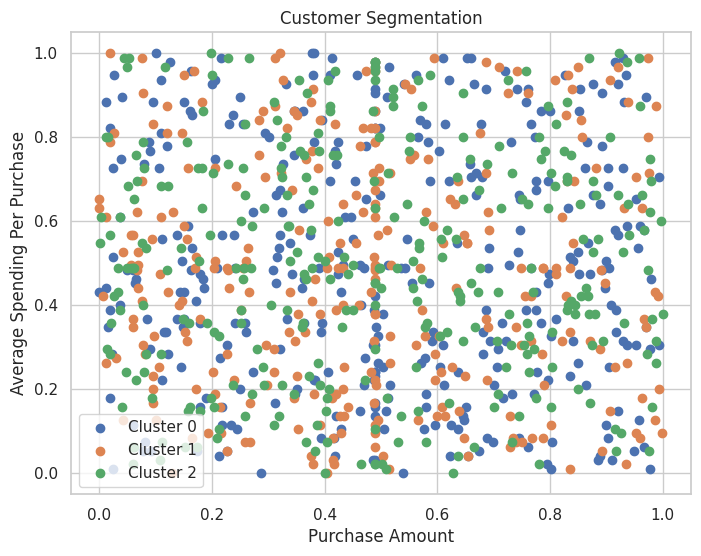

In [68]:
plt.figure(figsize=(8, 6))

# Assuming 'Purchase_Amount' and 'Average_Spending_Per_Purchase' are column names in df
for cluster in range(3):
    # Filter the DataFrame based on the cluster number
    cluster_data = df[df['clusters'] == cluster]
    # Create a scatter plot for each cluster
    plt.scatter(cluster_data['Purchase_Amount'], cluster_data['Average_Spending_Per_Purchase'], label=f'Cluster {cluster}')

# Adding titles and labels
plt.title('Customer Segmentation')
plt.xlabel('Purchase Amount')
plt.ylabel('Average Spending Per Purchase')
plt.legend()
plt.show()

<ipython-input-69-8ca1e09c85dd>:1: FutureWarning: ['Customer_ID', 'Gender', 'Income_Level', 'Address', 'Transaction_ID', 'Purchase_Date', 'Product_ID', 'Product_Category', 'Brand', 'Season'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  cluster_stats = df.groupby('clusters').agg(['mean', 'median', 'std'])


Cluster Means:
                Age  Purchase_Amount  Average_Spending_Per_Purchase  \
clusters                                                             
0         0.522024         0.508168                       0.494106   
1         0.522784         0.471684                       0.476640   
2         0.499234         0.486478                       0.494473   

          Purchase_Frequency_Per_Month  Brand_Affinity_Score     Month  \
clusters                                                                 
0                             0.492580              0.483622  0.515238   
1                             0.503841              0.468141  0.552099   
2                             0.481247              0.500823  0.522078   

              Year  Pref_Hidden  Pref_High  Pref_Low  Pref_Medium  
clusters                                                           
0         0.561053     0.000000        0.0       1.0     0.000000  
1         0.531248     0.000000        1.0       0.0     0

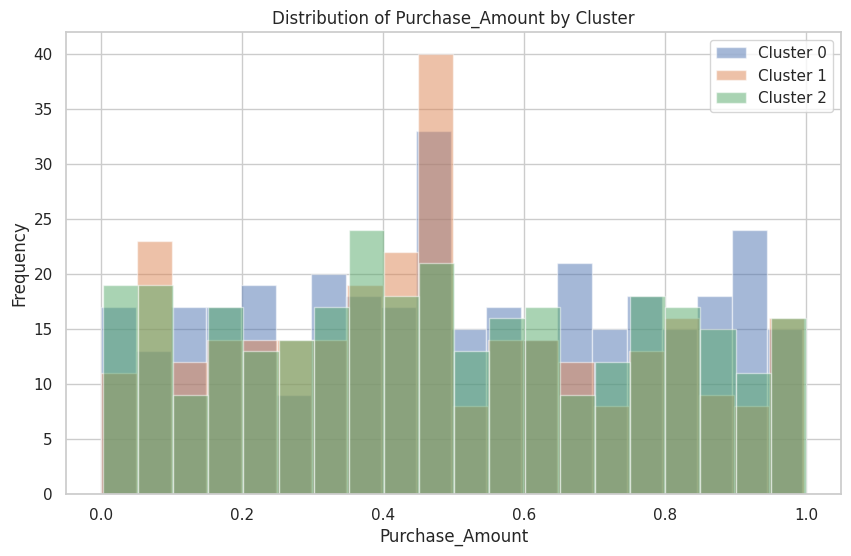

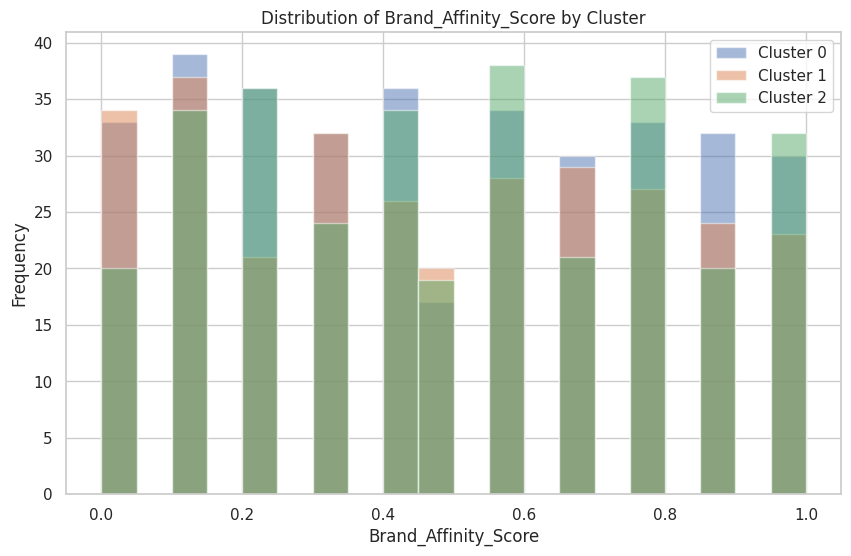

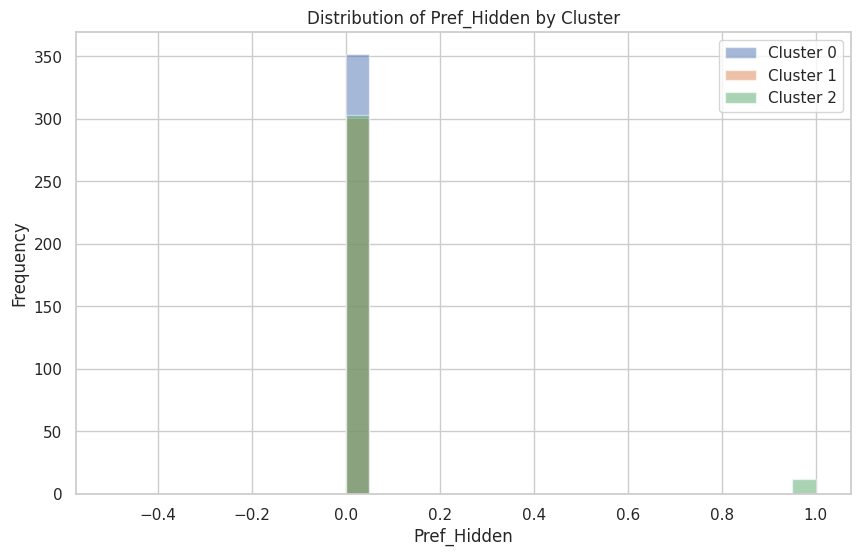

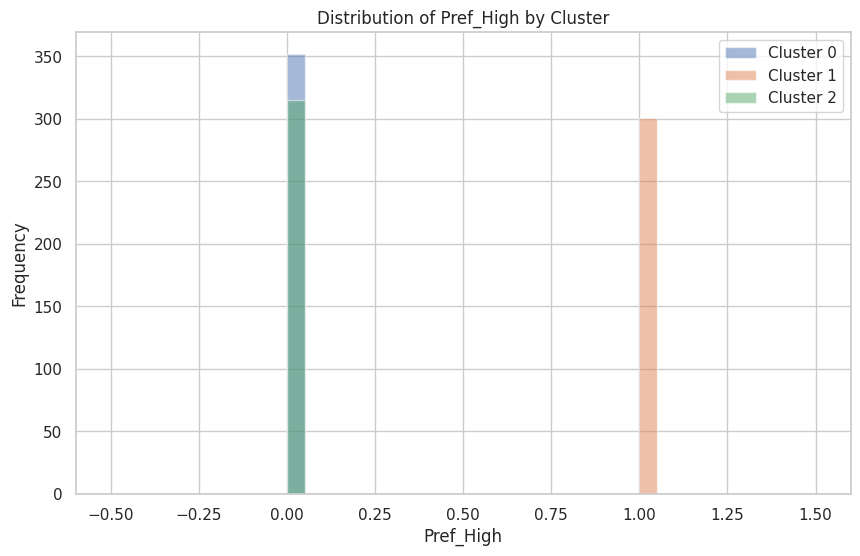

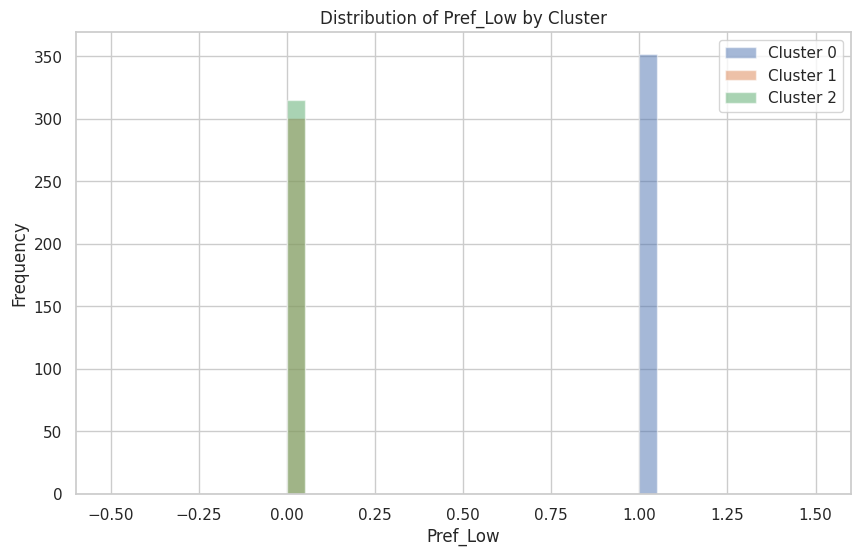

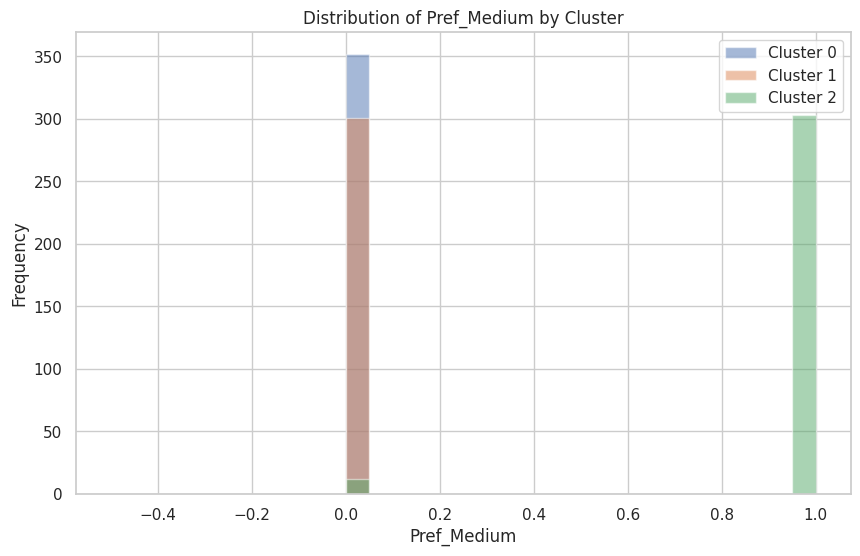

In [69]:
cluster_stats = df.groupby('clusters').agg(['mean', 'median', 'std'])

# Display the analysis
print("Cluster Means:\n", cluster_analysis)
print("\nCluster Stats:\n", cluster_stats)

# Selecting the key features for the analysis
key_features = ['Purchase_Amount', 'Brand_Affinity_Score', 'Pref_Hidden', 'Pref_High', 'Pref_Low', 'Pref_Medium']

# Investigate the key features of each cluster
for feature in key_features:
    plt.figure(figsize=(10, 6))
    for cluster in range(3):
        # Filter the DataFrame based on the cluster number
        cluster_data = df[df['clusters'] == cluster]
        # Create a histogram plot for each cluster
        plt.hist(cluster_data[feature], bins=20, label=f'Cluster {cluster}', alpha=0.5)

    # Adding titles and labels
    plt.title(f'Distribution of {feature} by Cluster')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()

[[-0.38221799 -0.64078786 -1.33378951 ... -0.67176958 -0.75592895
   1.48145856]
 [ 0.61194116 -0.58980729  0.47292764 ... -0.67176958  1.32287566
  -0.67501044]
 [ 0.83286542 -0.64078786  1.41392616 ... -0.67176958 -0.75592895
   1.48145856]
 ...
 [-0.10606267  1.01243912  1.11280663 ... -0.67176958  1.32287566
  -0.67501044]
 [ 0.83286542  1.09983438 -0.05403153 ... -0.67176958  1.32287566
  -0.67501044]
 [-1.54207033  0.50263345  0.54820752 ...  1.48860567 -0.75592895
  -0.67501044]]


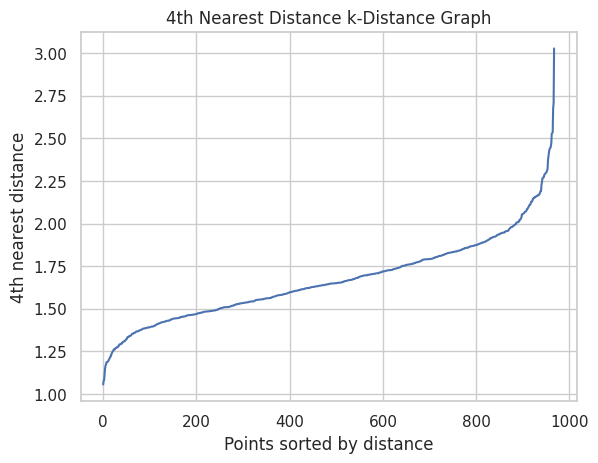

Skipping silhouette score calculation for eps=0.5, MinPts=3. Not enough unique labels.
Skipping silhouette score calculation for eps=0.5, MinPts=4. Not enough unique labels.
Skipping silhouette score calculation for eps=0.5, MinPts=5. Not enough unique labels.
DBSCAN Clustering with eps=1.0, MinPts=3, Silhouette Score: -0.28058131803376785
Skipping silhouette score calculation for eps=1.0, MinPts=4. Not enough unique labels.
Skipping silhouette score calculation for eps=1.0, MinPts=5. Not enough unique labels.
DBSCAN Clustering with eps=1.5, MinPts=3, Silhouette Score: -0.1654010419128186
DBSCAN Clustering with eps=1.5, MinPts=4, Silhouette Score: -0.19610281984582448
DBSCAN Clustering with eps=1.5, MinPts=5, Silhouette Score: -0.22881449723087838
DBSCAN Clustering with eps=2.0, MinPts=3, Silhouette Score: 0.22310317571693652
DBSCAN Clustering with eps=2.0, MinPts=4, Silhouette Score: 0.22741609964661125
DBSCAN Clustering with eps=2.0, MinPts=5, Silhouette Score: 0.22462053257911407
Be

In [70]:
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

scaler = StandardScaler()
X = scaler.fit_transform(df_combined)
print(X)

# Minimum points in the cluster condition
MinPts = 4

nbrs = NearestNeighbors(n_neighbors=MinPts).fit(X)
distances, indices = nbrs.kneighbors(X)

# Sort distances by ascending order and plot them
sorted_distances = np.sort(distances[:, MinPts-1])
plt.plot(sorted_distances)
plt.xlabel('Points sorted by distance')
plt.ylabel(f'{MinPts}th nearest distance')
plt.title(f'{MinPts}th Nearest Distance k-Distance Graph')
plt.show()

# Experiment with different values of eps (neighborhood radius) and MinPts
eps_values = [0.5, 1.0, 1.5, 2.0]
MinPts_values = [3, 4, 5]

best_silhouette_score = -1
best_eps = None
best_MinPts = None

for eps in eps_values:
    for MinPts in MinPts_values:

        dbscan = DBSCAN(eps=eps, min_samples=MinPts)
        df['DBSCAN_Cluster'] = dbscan.fit_predict(X)

        # Check the number of unique labels (excluding noise points)
        unique_labels = np.unique(df['DBSCAN_Cluster'][df['DBSCAN_Cluster'] != -1])

        # Skip silhouette score calculation if there is only one unique label
        if len(unique_labels) < 2:
            print(f"Skipping silhouette score calculation for eps={eps}, MinPts={MinPts}. Not enough unique labels.")
            continue

        # Evaluate the quality of the clusters using silhouette score
        silhouette_avg = silhouette_score(X, df['DBSCAN_Cluster'])

        # Print silhouette score for each combination
        print(f"DBSCAN Clustering with eps={eps}, MinPts={MinPts}, Silhouette Score: {silhouette_avg}")

        # Update best parameters if the current combination has a higher silhouette score
        if silhouette_avg > best_silhouette_score:
            best_silhouette_score = silhouette_avg
            best_eps = eps
            best_MinPts = MinPts

# Print the best parameters
print(f"Best Parameters: eps={best_eps}, MinPts={best_MinPts}, Silhouette Score: {best_silhouette_score}")

In [71]:
# Run DBSCAN with the best parameters
dbscan = DBSCAN(eps=best_eps, min_samples=best_MinPts)
df['DBSCAN_Cluster'] = dbscan.fit_predict(X)

In [72]:
df.head(10)

Customer_ID       Age  Gender Income_Level  \
968  fcfb43b9-0480-4917-9da8-6e17c884d83f  0.403226  Female       Medium   
688  a455f76c-cf6f-4cd6-9837-95250f45cd01  0.693548   Other          Low   
210  4697137e-18c0-4b48-9d23-5a967e774af4  0.758065    Male         High   
97   7c76c5e0-918a-4106-a814-631d64872c3b  0.806452    Male         High   
391  87977cfd-8c43-47db-9533-4ce6d9e0b4a7  0.112903   Other          Low   
518  8666e33a-0667-401e-8b59-9ffa2cbd30b9  0.096774    Male          Low   
478  bc222285-06db-4db8-b5ae-c6f0469807e4  0.080645    Male          Low   
720  33f6a206-f074-4992-84f9-9f5a305b02fd  0.838710    Male          Low   
423  e6dda886-50cf-4d9f-926f-418f211e26df  0.306452   Other         High   
141  9ebbf79c-dd6d-4e60-84b1-334ce794ee61  0.854839    Male       Medium   

                                               Address  \
968         99119 Richard Courts\nLake Mario, IN 71899   
688             2359 Mendez Point\nBriantown, AR 71911   
210                                            Unknown   
97   1271 Marilyn Orchard Suite 839\nPort Tinaport,...   
391  35107 Terry Tunnel Apt. 014\nCatherineborough,...   
518  4458 Nathaniel Views Apt. 211\nPeterborough, O...   
478      4362 Cameron Ramp\nNorth Heatherton, CO 07155   
720      9516 Kim Oval Suite 148\nAliciafort, WY 52510   
423  86345 Brandon Mountain Suite 408\nTorresstad, ...   
141                                            Unknown   

                           Transaction_ID Purchase_Date  \
968  673296a4-b23d-4a36-9e90-e41b1164f025    2020-10-22   
688  2236855c-d6f6-4d63-9b76-3a07059933df    2021-11-26   
210  30ef54cd-6a57-4712-85e3-321035d63c48    2022-05-29   
97   64e78933-0a6f-4ad7-aec8-be304b411437    2020-05-21   
391  e82f7a98-465f-4ab2-b5dd-4d97c6809f43    2023-01-13   
518  f2b9d751-37d1-4ebc-bca9-2034a5bd9623    2023-10-09   
478  45a26807-a299-497e-9b08-f1c6524439a7    2023-02-08   
720  071eaf3f-fc72-4058-86d6-1c91a06dc59e    2020-09-20   
423  f4267207-4454-4c68-b97f-1766edc2502e    2021-10-31   
141  a79873f1-0169-4c32-8496-d9c0805c8ee2    2022-07-08   

                               Product_ID Product_Category    Brand  ...  \
968  e56c5b9c-cd45-42de-a92c-2cc451958e6a            Books  Brand_A  ...   
688  42e75e81-4e7f-465a-96ff-49de5ff1dd5b         Clothing  Brand_A  ...   
210  1eacb3e7-d49a-4b6d-9c4a-978c58919117         Clothing  Brand_A  ...   
97   a5b9a371-7240-4720-a2f8-a3662983e713         Clothing  Brand_B  ...   
391  3e510b79-6a33-4c10-88c4-32c4d306abfd         Clothing  Brand_C  ...   
518  4633f30e-1ff2-4739-88e9-2d4c4598eb66         Clothing  Brand_B  ...   
478  82098476-bd4c-4c99-902d-2853f3a34fed      Electronics  Brand_C  ...   
720  1450e5de-e598-4e90-9875-27ec5778dbee      Electronics  Brand_B  ...   
423  7505e153-4f02-4d8e-b8d4-6756cfeda199      Electronics  Brand_A  ...   
141  c6117d43-64a3-4f54-9b73-28b6afd9da21      Electronics  Brand_C  ...   

     Brand_Affinity_Score     Month  Year  Season  Pref_Hidden  Pref_High  \
968              0.484405  0.000000   0.0  Winter            0          0   
688              0.666667  0.090909   0.0    Fall            0          0   
210              0.555556  0.090909   0.0  Summer            0          0   
97               0.555556  0.181818   0.0  Winter            0          0   
391              0.333333  0.181818   0.0  Summer            0          0   
518              0.000000  0.181818   0.0  Summer            0          0   
478              0.777778  0.272727   0.0  Summer            0          0   
720              0.484405  0.363636   0.0    Fall            0          0   
423              0.888889  0.454545   0.0    Fall            0          0   
141              0.000000  0.545455   0.0  Winter            0          0   

    Pref_Low  Pref_Medium  clusters  DBSCAN_Cluster  
968        0            1         2               0  
688        1            0         0               1  
210        0            1         2               0  
97 

In [73]:
# Display the number of points in each cluster
cluster_counts = df['DBSCAN_Cluster'].value_counts()
print("Number of points in each cluster:")
for cluster_label, count in cluster_counts.items():
    print(f"Cluster {cluster_label}: {count}")

# Display the number of noise points (points labeled as -1)
noise_points = np.sum(df['DBSCAN_Cluster'] == -1)
print(f"\nNumber of noise points: {noise_points}")


Number of points in each cluster:
Cluster 1: 350
Cluster 2: 299
Cluster 0: 297
Cluster -1: 22

Number of noise points: 22


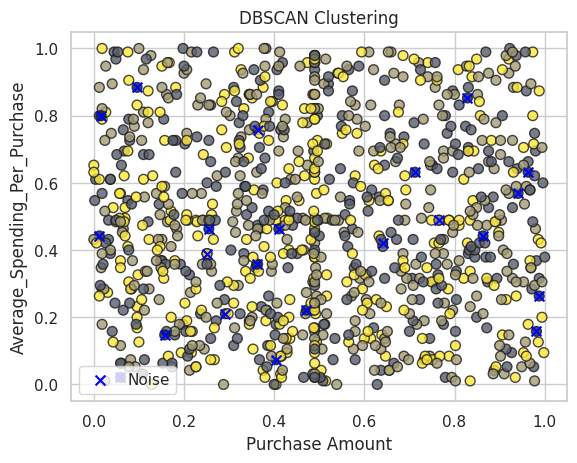

In [74]:
# Visualize DBSCAN clusters
plt.scatter(
    df['Purchase_Amount'], df['Average_Spending_Per_Purchase'],
    c=df['DBSCAN_Cluster'], cmap='cividis', edgecolor='k', marker='o', s=50, alpha=0.8
)


plt.scatter(
    df[df['DBSCAN_Cluster'] == -1]['Purchase_Amount'],
    df[df['DBSCAN_Cluster'] == -1]['Average_Spending_Per_Purchase'],
    c='blue', marker='x', s=50, label='Noise'
)

plt.title('DBSCAN Clustering')
plt.xlabel('Purchase Amount')
plt.ylabel('Average_Spending_Per_Purchase')
plt.legend()
plt.show()



In [75]:
kmeans = KMeans(n_clusters=3, random_state=0)
df['KMeans_Cluster'] = kmeans.fit_predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [76]:
# DBSCAN cluster sizes
print("DBSCAN Cluster Sizes:")
print(df['DBSCAN_Cluster'].value_counts())

# K-Means cluster sizes
print("\nK-Means Cluster Sizes:")
print(df['KMeans_Cluster'].value_counts())


DBSCAN Cluster Sizes:
 1    350
 2    299
 0    297
-1     22
Name: DBSCAN_Cluster, dtype: int64

K-Means Cluster Sizes:
2    352
0    315
1    301
Name: KMeans_Cluster, dtype: int64


In [77]:
# Density calculation for DBSCAN clusters
core_samples_mask = np.zeros_like(dbscan.labels_, dtype=bool)
core_samples_mask[dbscan.core_sample_indices_] = True
density_per_cluster_dbscan = np.bincount(df['DBSCAN_Cluster'][core_samples_mask])

# Print densities for each DBSCAN cluster
print("\nDensity of DBSCAN Clusters:")
for cluster_label, density in enumerate(density_per_cluster_dbscan):
    print(f"Cluster {cluster_label}: {density}")



Density of DBSCAN Clusters:
Cluster 0: 273
Cluster 1: 332
Cluster 2: 281


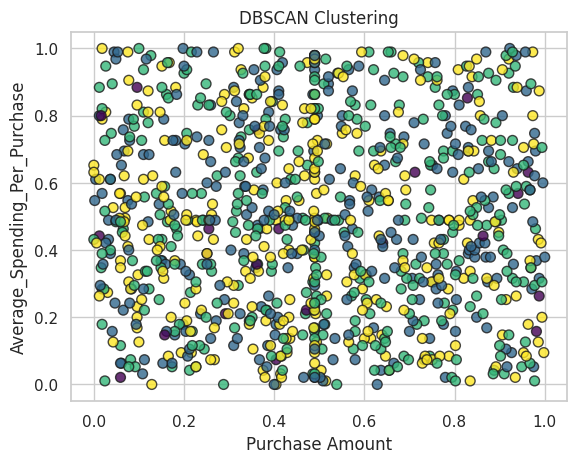

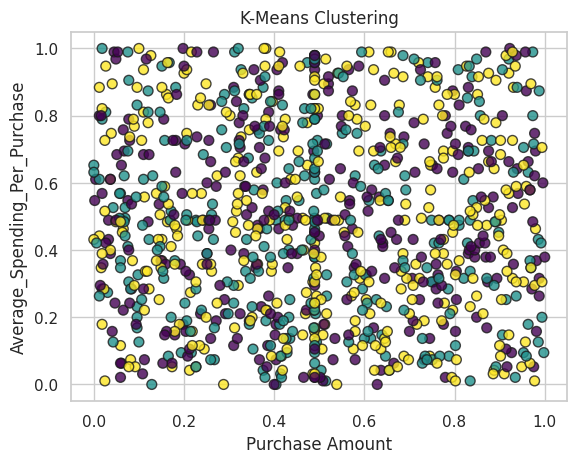

In [78]:
# Visualize DBSCAN clusters
plt.scatter(
    df['Purchase_Amount'], df['Average_Spending_Per_Purchase'],
    c=df['DBSCAN_Cluster'], cmap='viridis', edgecolor='k', marker='o', s=50, alpha=0.8
)
plt.title('DBSCAN Clustering')
plt.xlabel('Purchase Amount')
plt.ylabel('Average_Spending_Per_Purchase')
plt.show()

# Visualize K-Means clusters
plt.scatter(
    df['Purchase_Amount'], df['Average_Spending_Per_Purchase'],
    c=df['KMeans_Cluster'], cmap='viridis', edgecolor='k', marker='o', s=50, alpha=0.8
)
plt.title('K-Means Clustering')
plt.xlabel('Purchase Amount')
plt.ylabel('Average_Spending_Per_Purchase')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Regular K-Means Cluster Sizes:
2    352
0    315
1    301
Name: KMeans_Cluster, dtype: int64

K-Means++ Cluster Sizes:
2    352
0    315
1    301
Name: KMeans_PP_Cluster, dtype: int64


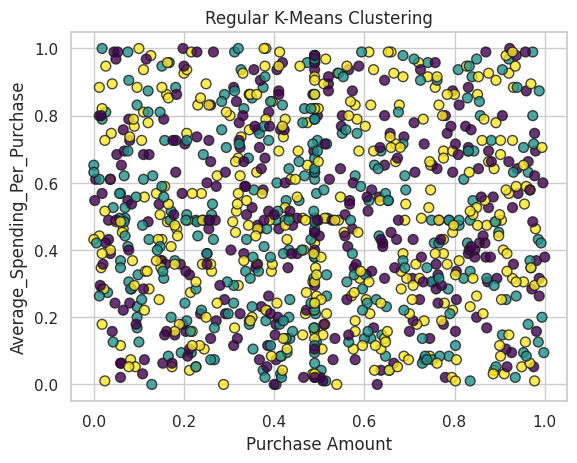

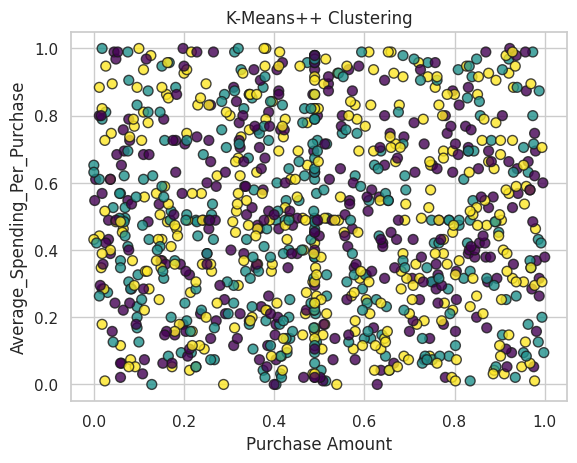

In [79]:
from sklearn.cluster import KMeans
import time

# Number of clusters
num_clusters = 3

# Regular K-Means
kmeans = KMeans(n_clusters=num_clusters, random_state=0)
df['KMeans_Cluster'] = kmeans.fit_predict(X)

# K-Means++ initialization
kmeans_pp = KMeans(n_clusters=num_clusters, init='k-means++', random_state=0)
df['KMeans_PP_Cluster'] = kmeans_pp.fit_predict(X)

# Compare the resulting clusters
print("Regular K-Means Cluster Sizes:")
print(df['KMeans_Cluster'].value_counts())

print("\nK-Means++ Cluster Sizes:")
print(df['KMeans_PP_Cluster'].value_counts())

# Visualize Regular K-Means clusters
plt.scatter(
    df['Purchase_Amount'], df['Average_Spending_Per_Purchase'],
    c=df['KMeans_Cluster'], cmap='viridis', edgecolor='k', marker='o', s=50, alpha=0.8
)
plt.title('Regular K-Means Clustering')
plt.xlabel('Purchase Amount')
plt.ylabel('Average_Spending_Per_Purchase')
plt.show()

# Visualize K-Means++ clusters
plt.scatter(
    df['Purchase_Amount'], df['Average_Spending_Per_Purchase'],
    c=df['KMeans_PP_Cluster'], cmap='viridis', edgecolor='k', marker='o', s=50, alpha=0.8
)
plt.title('K-Means++ Clustering')
plt.xlabel('Purchase Amount')
plt.ylabel('Average_Spending_Per_Purchase')
plt.show()


In [80]:
#Module 4

In [81]:
from sklearn.metrics import silhouette_score

# Silhouette Score for K-Means
silhouette_kmeans = silhouette_score(X, df['KMeans_Cluster'])
print(f"Silhouette Score for K-Means: {silhouette_kmeans}")

# Silhouette Score for DBSCAN
silhouette_dbscan = silhouette_score(X, df['DBSCAN_Cluster'])
print(f"Silhouette Score for DBSCAN: {silhouette_dbscan}")

# Silhouette Score for K-Means++
silhouette_kmeans_pp = silhouette_score(X, df['KMeans_PP_Cluster'])
print(f"Silhouette Score for K-Means++: {silhouette_kmeans_pp}")


Silhouette Score for K-Means: 0.21467958581998275
Silhouette Score for DBSCAN: 0.22741609964661125
Silhouette Score for K-Means++: 0.21467958581998275


In [82]:
from sklearn.metrics import calinski_harabasz_score

# Calinski-Harabasz Score for K-Means
ch_kmeans = calinski_harabasz_score(X, df['KMeans_Cluster'])
print(f"Calinski-Harabasz Score for K-Means: {ch_kmeans}")

# Calinski-Harabasz Score for DBSCAN (may not be applicable, as it assumes convex clusters)
# ch_dbscan = calinski_harabasz_score(X, df['DBSCAN_Cluster'])
# print(f"Calinski-Harabasz Score for DBSCAN: {ch_dbscan}")

# Calinski-Harabasz Score for K-Means++
ch_kmeans_pp = calinski_harabasz_score(X, df['KMeans_PP_Cluster'])
print(f"Calinski-Harabasz Score for K-Means++: {ch_kmeans_pp}")


Calinski-Harabasz Score for K-Means: 179.80258988185335
Calinski-Harabasz Score for K-Means++: 179.80258988185335


In [83]:
from sklearn.metrics import davies_bouldin_score

# Davies-Bouldin Index for K-Means
db_kmeans = davies_bouldin_score(X, df['KMeans_Cluster'])
print(f"Davies-Bouldin Index for K-Means: {db_kmeans}")

# Davies-Bouldin Index for DBSCAN (may not be applicable, as it assumes convex clusters)
# db_dbscan = davies_bouldin_score(X, df['DBSCAN_Cluster'])
# print(f"Davies-Bouldin Index for DBSCAN: {db_dbscan}")

# Davies-Bouldin Index for K-Means++
db_kmeans_pp = davies_bouldin_score(X, df['KMeans_PP_Cluster'])
print(f"Davies-Bouldin Index for K-Means++: {db_kmeans_pp}")


Davies-Bouldin Index for K-Means: 1.842163090845591
Davies-Bouldin Index for K-Means++: 1.842163090845591


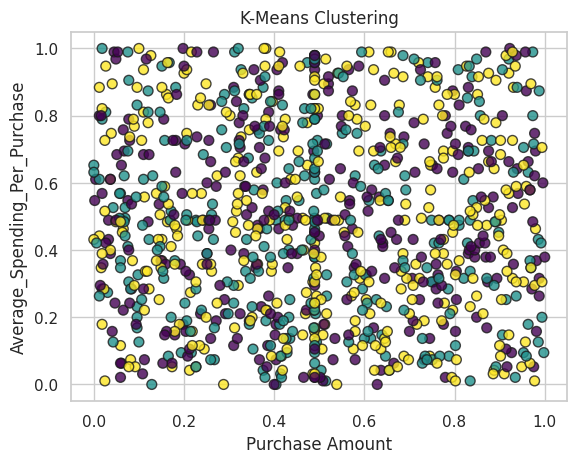

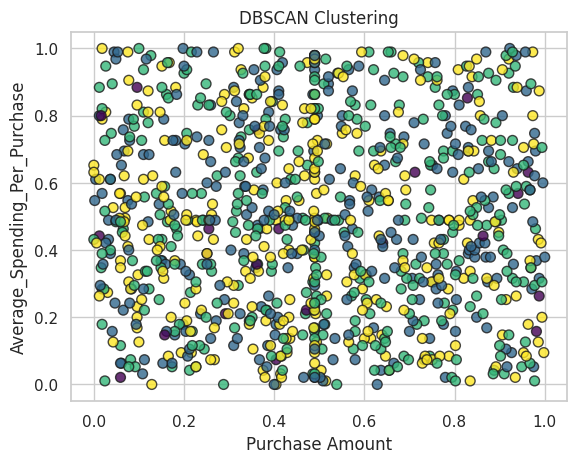

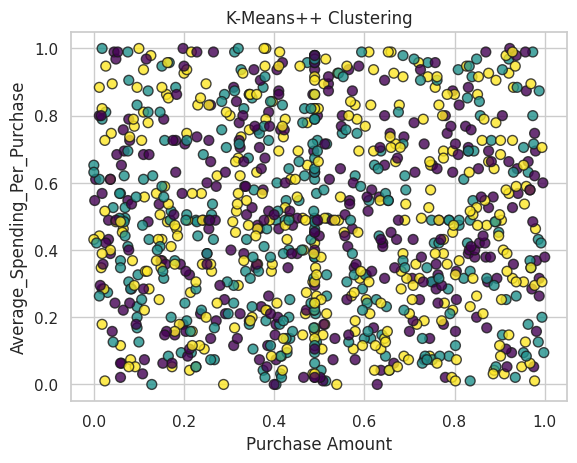

In [84]:
# Visualize K-Means clusters
plt.scatter(
    df['Purchase_Amount'], df['Average_Spending_Per_Purchase'],
    c=df['KMeans_Cluster'], cmap='viridis', edgecolor='k', marker='o', s=50, alpha=0.8
)
plt.title('K-Means Clustering')
plt.xlabel('Purchase Amount')
plt.ylabel('Average_Spending_Per_Purchase')
plt.show()

# Visualize DBSCAN clusters
plt.scatter(
    df['Purchase_Amount'], df['Average_Spending_Per_Purchase'],
    c=df['DBSCAN_Cluster'], cmap='viridis', edgecolor='k', marker='o', s=50, alpha=0.8
)
plt.title('DBSCAN Clustering')
plt.xlabel('Purchase Amount')
plt.ylabel('Average_Spending_Per_Purchase')
plt.show()

# Visualize K-Means++ clusters
plt.scatter(
    df['Purchase_Amount'], df['Average_Spending_Per_Purchase'],
    c=df['KMeans_PP_Cluster'], cmap='viridis', edgecolor='k', marker='o', s=50, alpha=0.8
)
plt.title('K-Means++ Clustering')
plt.xlabel('Purchase Amount')
plt.ylabel('Average_Spending_Per_Purchase')
plt.show()


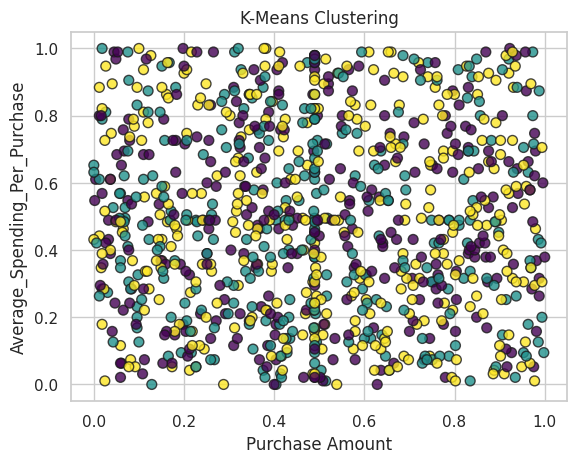

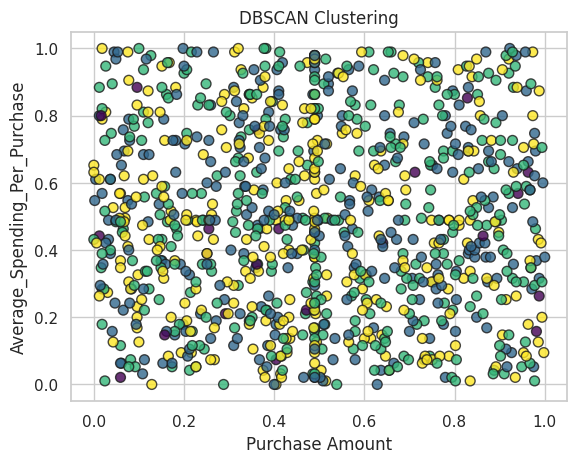

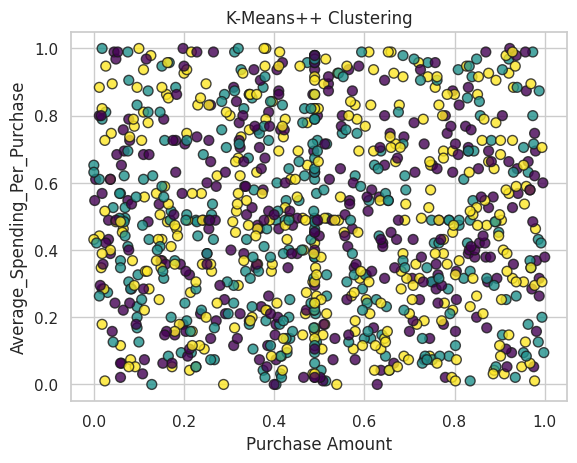

In [85]:
#Part 2
# Visualize K-Means clusters
plt.scatter(
    df['Purchase_Amount'], df['Average_Spending_Per_Purchase'],
    c=df['KMeans_Cluster'], cmap='viridis', edgecolor='k', marker='o', s=50, alpha=0.8
)
plt.title('K-Means Clustering')
plt.xlabel('Purchase Amount')
plt.ylabel('Average_Spending_Per_Purchase')
plt.show()

# Visualize DBSCAN clusters
plt.scatter(
    df['Purchase_Amount'], df['Average_Spending_Per_Purchase'],
    c=df['DBSCAN_Cluster'], cmap='viridis', edgecolor='k', marker='o', s=50, alpha=0.8
)
plt.title('DBSCAN Clustering')
plt.xlabel('Purchase Amount')
plt.ylabel('Average_Spending_Per_Purchase')
plt.show()

# Visualize K-Means++ clusters
plt.scatter(
    df['Purchase_Amount'], df['Average_Spending_Per_Purchase'],
    c=df['KMeans_PP_Cluster'], cmap='viridis', edgecolor='k', marker='o', s=50, alpha=0.8
)
plt.title('K-Means++ Clustering')
plt.xlabel('Purchase Amount')
plt.ylabel('Average_Spending_Per_Purchase')
plt.show()


In [86]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

# Silhouette Score
silhouette_kmeans = silhouette_score(X, df['KMeans_Cluster'])
silhouette_dbscan = silhouette_score(X, df['DBSCAN_Cluster'])
silhouette_kmeans_pp = silhouette_score(X, df['KMeans_PP_Cluster'])

# Calinski-Harabasz Score
ch_kmeans = calinski_harabasz_score(X, df['KMeans_Cluster'])
# ch_dbscan = calinski_harabasz_score(X, df['DBSCAN_Cluster'])
ch_kmeans_pp = calinski_harabasz_score(X, df['KMeans_PP_Cluster'])

# Davies-Bouldin Index
db_kmeans = davies_bouldin_score(X, df['KMeans_Cluster'])
# db_dbscan = davies_bouldin_score(X, df['DBSCAN_Cluster'])
db_kmeans_pp = davies_bouldin_score(X, df['KMeans_PP_Cluster'])


In [89]:
# Analyze K-Means clusters
kmeans_cluster_means = df.groupby('KMeans_Cluster').mean()

# Analyze DBSCAN clusters (excluding noise points)
dbscan_cluster_means = df[df['DBSCAN_Cluster'] != -1].groupby('DBSCAN_Cluster').mean()

# Analyze K-Means++ clusters
kmeans_pp_cluster_means = df.groupby('KMeans_PP_Cluster').mean()


<ipython-input-89-f3058d2c56e4>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  kmeans_cluster_means = df.groupby('KMeans_Cluster').mean()
<ipython-input-89-f3058d2c56e4>:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dbscan_cluster_means = df[df['DBSCAN_Cluster'] != -1].groupby('DBSCAN_Cluster').mean()
<ipython-input-89-f3058d2c56e4>:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  kmeans_pp_cluster_means = df.gro

In [91]:
print(kmeans_cluster_means)
print(dbscan_cluster_means)
print(kmeans_pp_cluster_means)

                     Age  Purchase_Amount  Average_Spending_Per_Purchase  \
KMeans_Cluster                                                             
0               0.499234         0.486478                       0.494473   
1               0.522784         0.471684                       0.476640   
2               0.522024         0.508168                       0.494106   

                Purchase_Frequency_Per_Month  Brand_Affinity_Score     Month  \
KMeans_Cluster                                                                 
0                                   0.481247              0.500823  0.522078   
1                                   0.503841              0.468141  0.552099   
2                                   0.492580              0.483622  0.515238   

                    Year  Pref_Hidden  Pref_High  Pref_Low  Pref_Medium  \
KMeans_Cluster                                                            
0               0.506978     0.038095        0.0       0.0     0.961

In [113]:
def recommend_products(cluster_label, cluster_mean):
    print(f"Recommendations for Cluster {cluster_label}:")

    # Adjusting conditions for standardized values
    if cluster_mean['Purchase_Amount'] > 0 and cluster_mean['Average_Spending_Per_Purchase'] > 0:
        print("High-value and frequent purchases. Consider premium electronics and exclusive offers.")
    elif cluster_mean['Purchase_Amount'] > 0 and cluster_mean['Average_Spending_Per_Purchase'] <= 0:
        print("High-value purchases but with moderate spending per purchase. Explore new arrivals and bestsellers.")
    elif cluster_mean['Purchase_Amount'] <= 0:
        print("No purchases made. Check out our latest products and enjoy an exclusive first-purchase discount.")
    elif cluster_mean['Purchase_Amount'] > 0 and cluster_mean['Purchase_Frequency_Per_Month'] > 0:
        print("Consistently high-value purchases and a loyal customer. Access VIP promotions and early access to sales.")
    elif cluster_mean['Purchase_Amount'] > 0 and cluster_mean['Average_Spending_Per_Purchase'] > 1:
        print("High-value purchases with substantial spending per purchase. Unlock premium membership benefits.")
    else:
        print("Explore our diverse product range and discover personalized recommendations.")

# Loop through K-Means clusters and make recommendations
for cluster_label, cluster_mean in kmeans_cluster_means.iterrows():
    recommend_products(cluster_label, cluster_mean)


Recommendations for Cluster 0:
High-value and frequent purchases. Consider premium electronics and exclusive offers.
Recommendations for Cluster 1:
High-value and frequent purchases. Consider premium electronics and exclusive offers.
Recommendations for Cluster 2:
High-value and frequent purchases. Consider premium electronics and exclusive offers.


In [112]:
cluster_mean

Age                              0.522024
Purchase_Amount                  0.508168
Average_Spending_Per_Purchase    0.494106
Purchase_Frequency_Per_Month     0.492580
Brand_Affinity_Score             0.483622
Month                            0.515238
Year                             0.561053
Pref_Hidden                      0.000000
Pref_High                        0.000000
Pref_Low                         1.000000
Pref_Medium                      0.000000
clusters                         0.000000
DBSCAN_Cluster                   0.988636
KMeans_PP_Cluster                2.000000
Name: 2, dtype: float64